In [2]:
import pandas as pd 

In [10]:
diabetes2_df = pd.read_csv('diabetes_data_upload.csv')


In [6]:
pd.read_csv('diabetes_data_upload.csv')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


Code to transforn to binary with the exception of age column, also transform male to 1 and female to cero, I have Alopecia as test here (see below).

In [11]:
alopecia_zero_count = (diabetes2_df['Alopecia'] == 'No').sum()

print(f"Number of rows where Alopecia equals 0: {alopecia_zero_count}")




Number of rows where Alopecia equals 0: 341


Transform Yes/No columns to 1/0 and Male/Female to 1/0.

In [13]:

diabetes2_df = diabetes2_df.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

print(diabetes2_df.head())



   Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0   40       1         0           1                   0         1   
1   58       1         0           0                   0         1   
2   41       1         1           0                   0         1   
3   45       1         0           0                   1         1   
4   60       1         1           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2           1               0                0        1             0   
3           1               1                0        1             0   
4           1               0                1        1             1   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  \
0                1                0                 1         1 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9292\3572775591.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabetes2_df = diabetes2_df.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


This code fills all missing (NaN) values in the diabetes2_df dataset with 0 using fillna(0). Afterward, it checks for any remaining missing values in the dataset using isnull().sum() and prints the total count of missing values (which should be 0 after the operation).

In [14]:

diabetes2_df = diabetes2_df.fillna(0)  

print("Missing values after filling:\n", diabetes2_df.isnull().sum())


Missing values after filling:
 Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64



To explore demographics, I need to consider gender or age to understand the distribution of patients.
To analyze a symptom strongly linked to diabetes,  I am considering:
polyuria (frequent urination) and polydipsia (excessive thirst), as these are hallmark symptoms of diabetes.
Sudden_weight_loss, as it often signals metabolic changes associated with diabetes.
Among these, polyuria could be the best to plot first since it is one of the most consistent and defining symptoms of diabetes in clinical observations.

This code creates a bar plot showing the frequency of each unique value in the "Age" column of the dataset.

<Axes: xlabel='Age'>

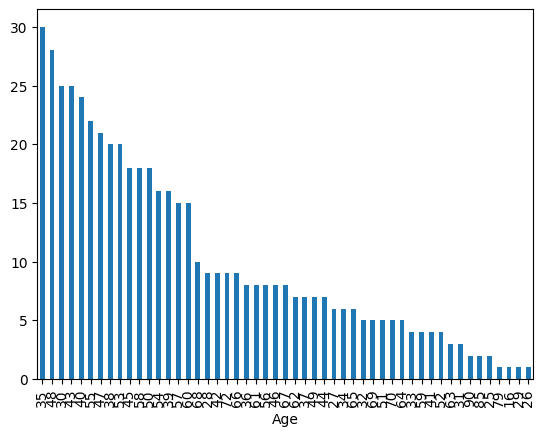

In [15]:
diabetes2_df["Age"].value_counts().plot(kind="bar")

In [16]:
import matplotlib.pyplot as plt


Initially I, define and create a new column for BRFSS-based age ranges. Then, Plot value counts for age ranges.

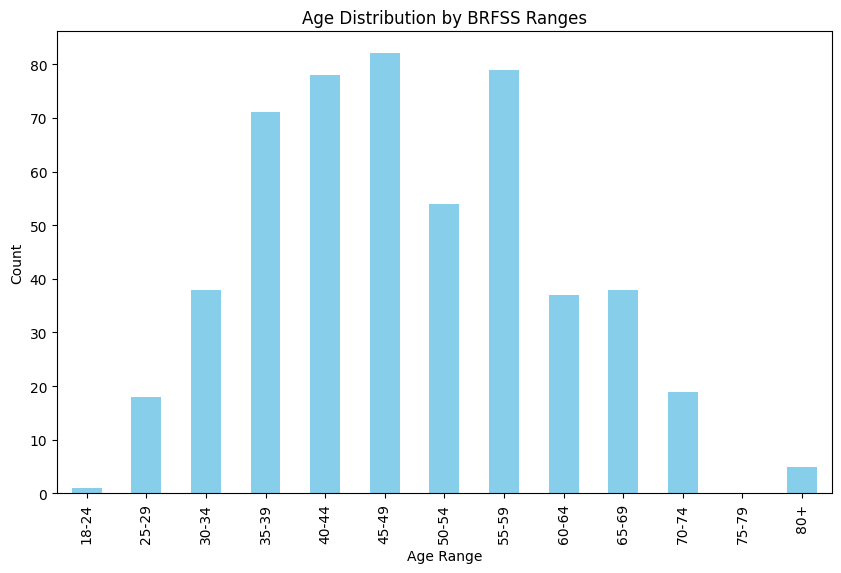

In [17]:

bins = [0, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 100]
labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', 
          '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']


diabetes2_df['Age_Range'] = pd.cut(diabetes2_df['Age'], bins=bins, labels=labels, right=False)


diabetes2_df['Age_Range'].value_counts().sort_index().plot(kind="bar", figsize=(10, 6), color="skyblue")
plt.title("Age Distribution by BRFSS Ranges")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.show()


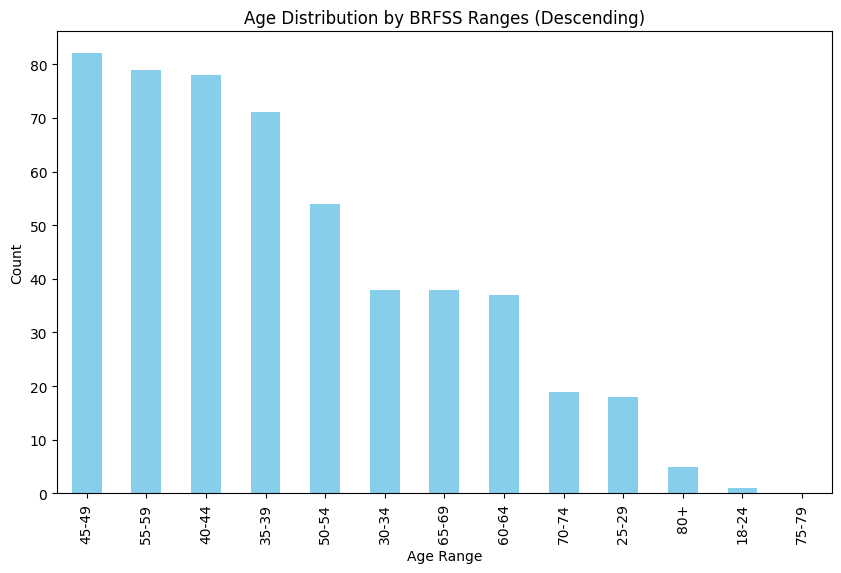

In [18]:

bins = [0, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 100]
labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', 
          '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']


diabetes2_df['Age_Range'] = pd.cut(diabetes2_df['Age'], bins=bins, labels=labels, right=False)


age_counts = diabetes2_df['Age_Range'].value_counts().sort_values(ascending=False)


age_counts.plot(kind="bar", figsize=(10, 6), color="skyblue")
plt.title("Age Distribution by BRFSS Ranges (Descending)")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.show()


Plottig number of males and females.

<Axes: xlabel='Gender'>

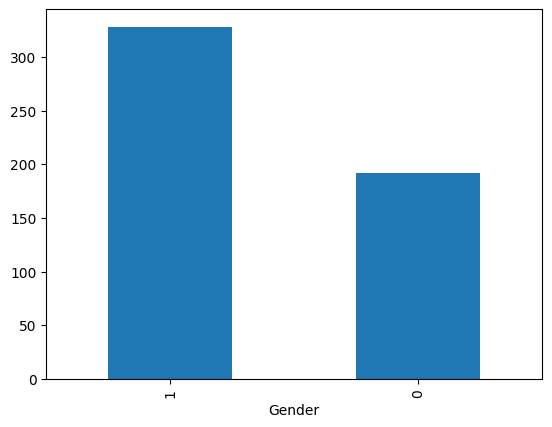

In [19]:
diabetes2_df["Gender"].value_counts().plot(kind="bar")

Plottig number of males and females, just adapting the colour.

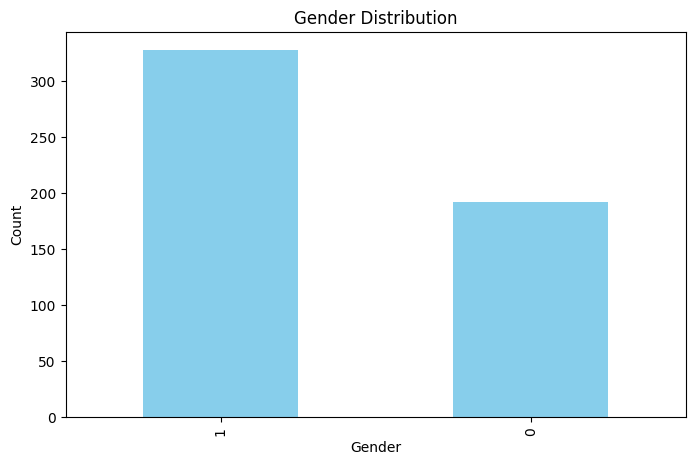

In [20]:

diabetes2_df["Gender"].value_counts().plot(kind="bar", figsize=(8, 5), color="skyblue")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


This bar charts visualizes the distribution of the different symptoms in the dataset. The code counts how many instances of 1 (presence of conditions) and 0 (absence of conditions) are present and plots these counts. The chart shows that more cases of 1  are slightly higher than 0, helping to understand the prevalence of these symptoms in the dataset.

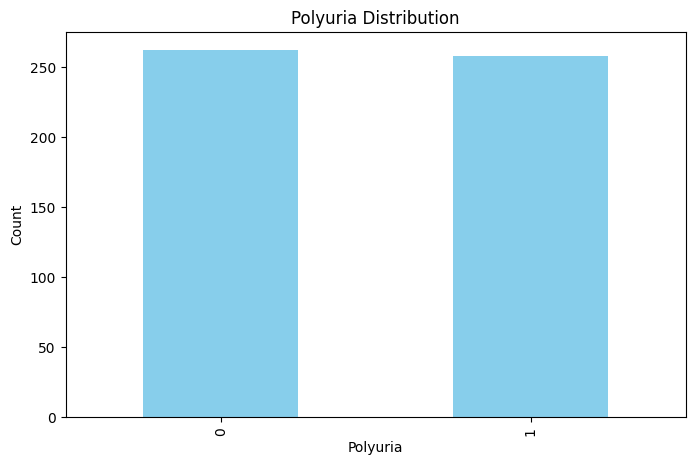

In [21]:

diabetes2_df["Polyuria"].value_counts().plot(kind="bar", figsize=(8, 5), color="skyblue")
plt.title("Polyuria Distribution")
plt.xlabel("Polyuria")
plt.ylabel("Count")
plt.show()


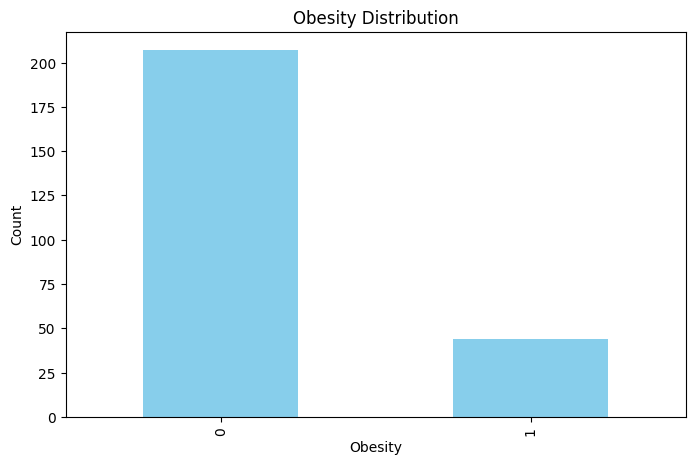

In [59]:

diabetes2_df["Obesity"].value_counts().plot(kind="bar", figsize=(8, 5), color="skyblue")
plt.title("Obesity Distribution")
plt.xlabel("Obesity")
plt.ylabel("Count")
plt.show()


Im this data cleaning I am removing duplicates.

Check for missing values and handle them appropriately (fill with mean, mode, or drop, if necessary).
Standardize categorical values (e.g., ensure consistent formats like Yes/No to 1/0).
Ensure all data types are correct (e.g., numerical columns must be int or float).
Code Example:

I first identified all numeric columns in the dataset and calculated the sum of values for each column. I then sorted these columns in descending order based on their total values, ensuring that columns with the highest sums were processed first. Finally, I looped through this sorted list of columns and created clear histograms for each, visually displaying the distribution of their values, with a consistent color scheme and formatting for easy interpretation.

In [22]:

diabetes2_df = diabetes2_df.drop_duplicates()
print(f"New dataset size after removing duplicates: {diabetes2_df.shape}")


numeric_cols = diabetes2_df.select_dtypes(include=['float64', 'int64']).columns
diabetes2_df[numeric_cols] = diabetes2_df[numeric_cols].fillna(diabetes2_df[numeric_cols].mean())


columns_to_transform = [col for col in diabetes2_df.columns if col != 'Age']
diabetes2_df[columns_to_transform] = diabetes2_df[columns_to_transform].replace({'Yes': 1, 'No': 0})

print("Data cleaning completed")



New dataset size after removing duplicates: (251, 18)
Data cleaning completed


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


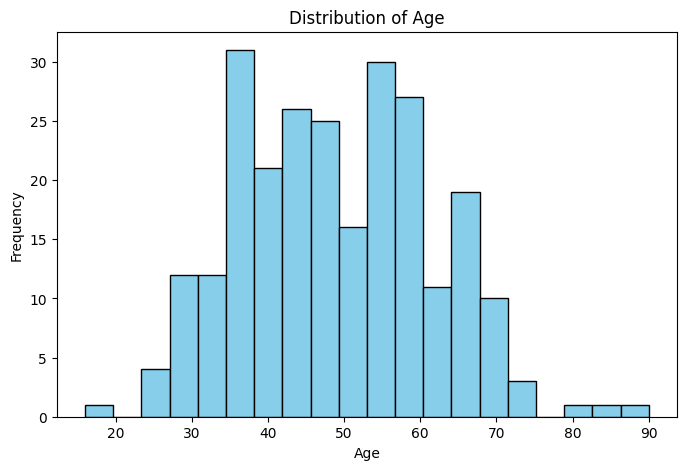

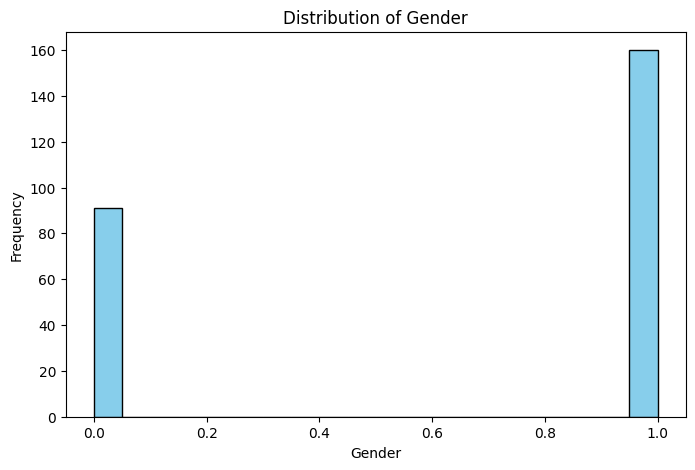

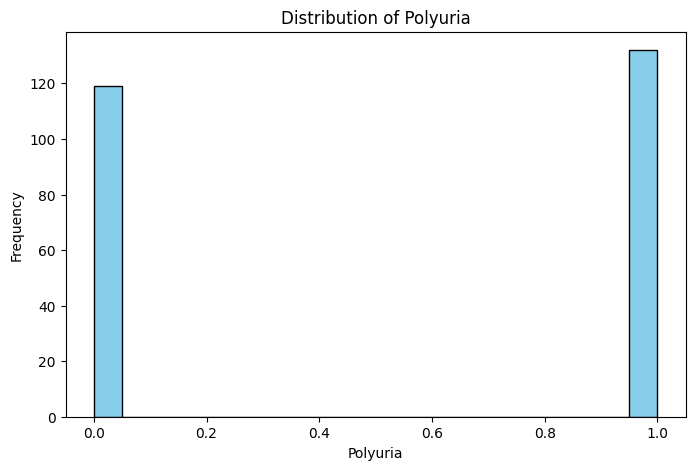

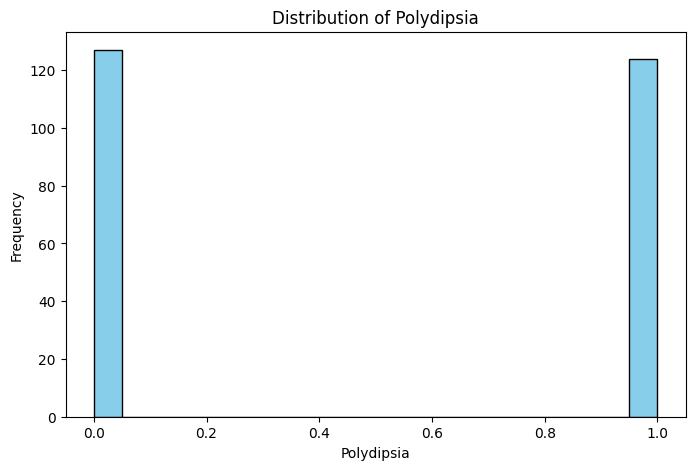

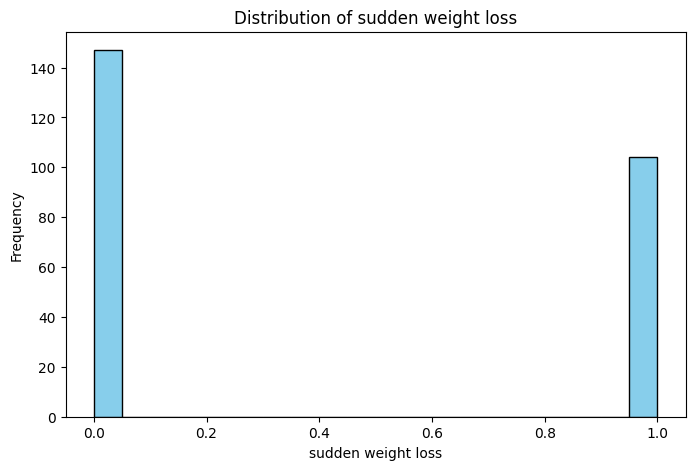

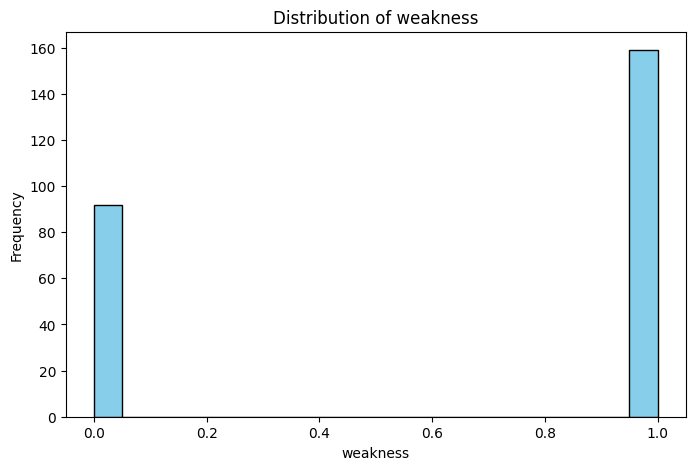

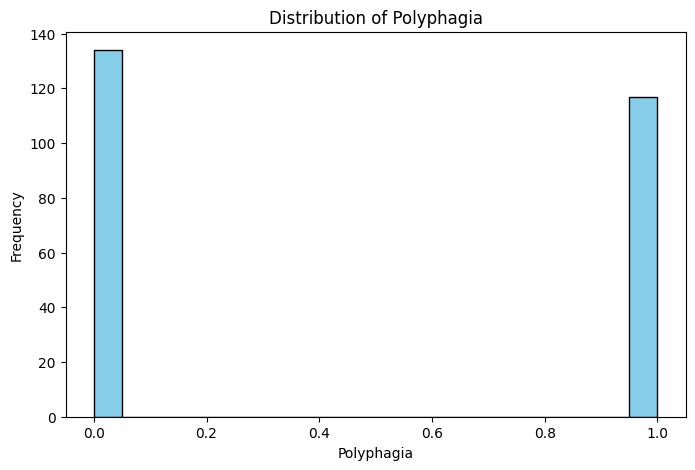

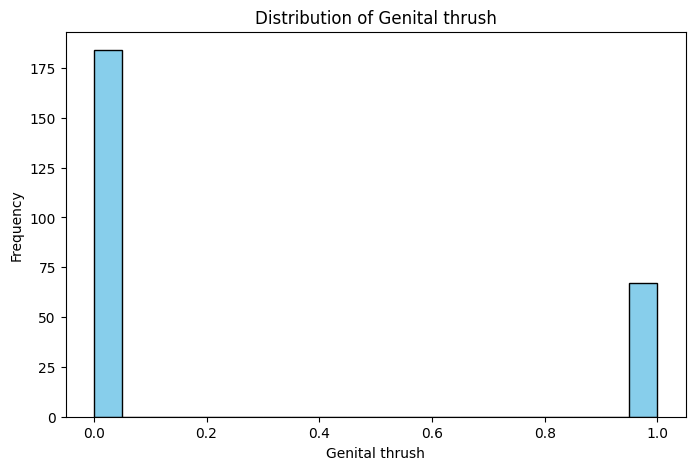

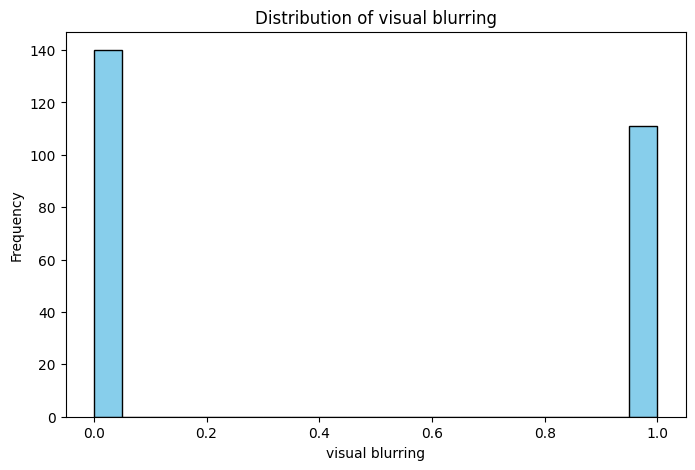

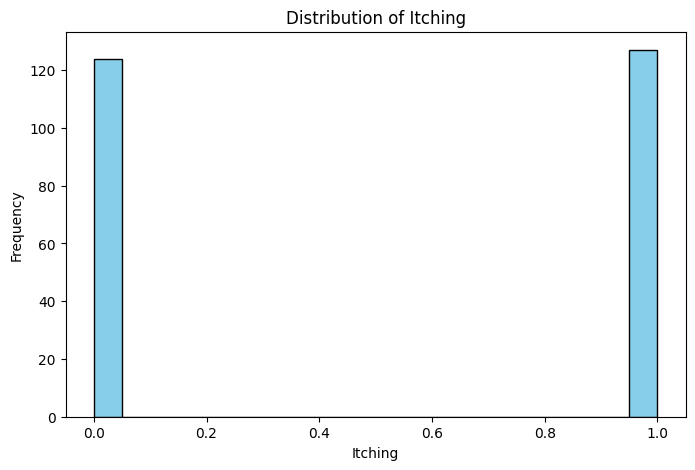

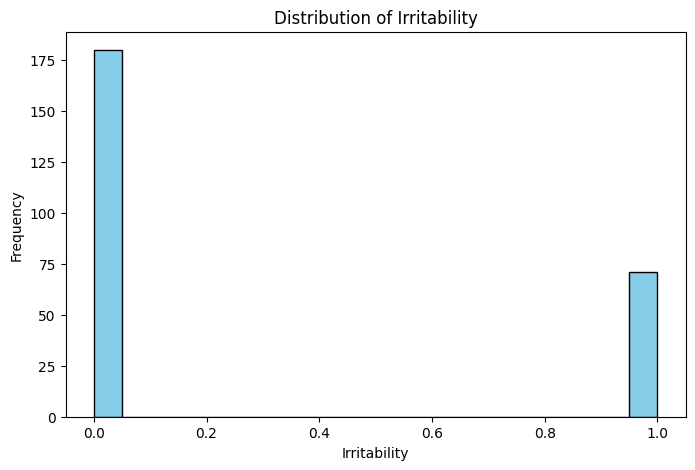

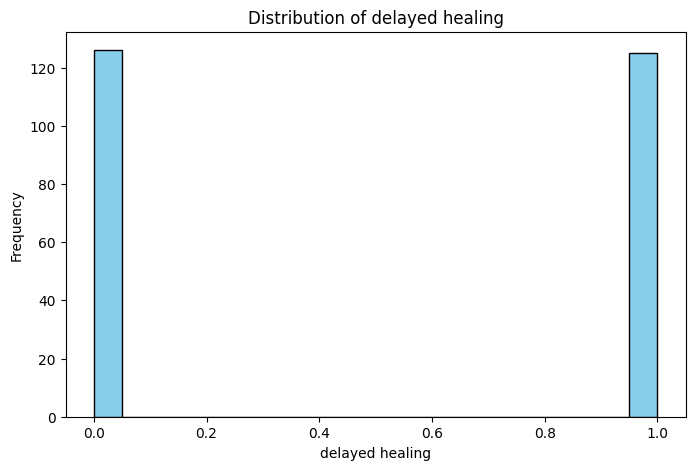

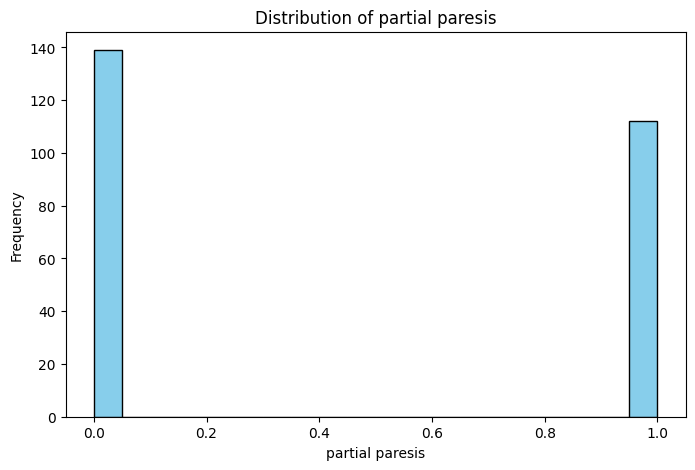

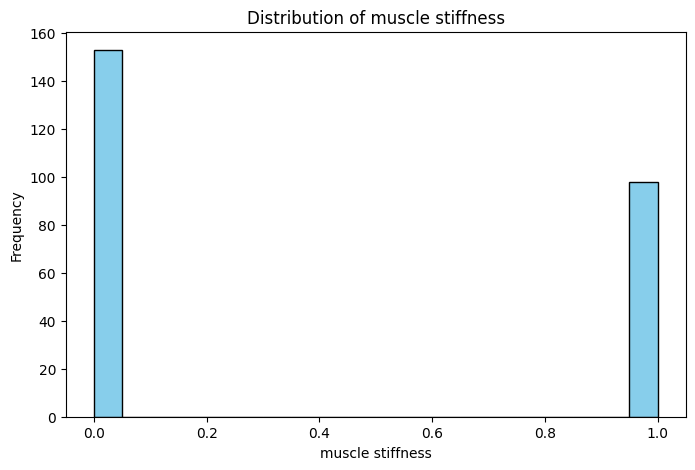

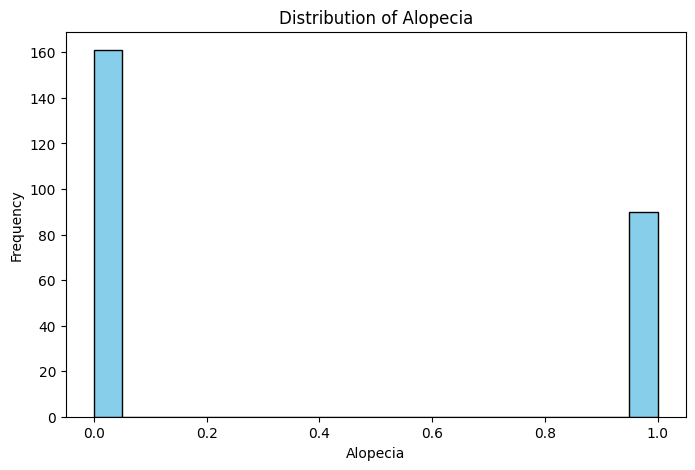

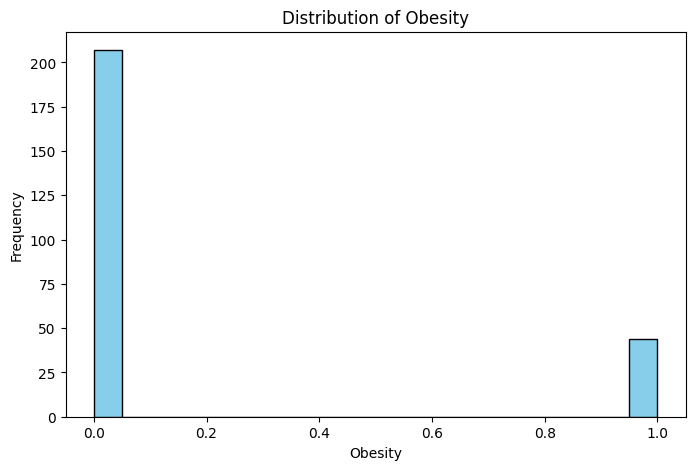

In [24]:
numeric_cols = diabetes2_df.select_dtypes(include=['int64', 'float64']).columns


for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    diabetes2_df[col].hist(bins=20, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(False)
    plt.show()


In the above histograms I am visualizing the distribution of variables, which appears to be binary, with values of 0 and 1. The bars indicate the frequency of each value in the dataset: the left bar (value 0) represents individuals without symptoms, while the right bar (value 1) represents those with symptoms. The similar heights of the bars suggest a relatively balanced distribution between the two groups.

### Counts of symptoms can be seen below

The histograms below show how the "Symptom" variable is distributed. This variable is binary, meaning it has only two values: 0 (no symptom) and 1 (has the symptom). The left bar (0) shows how many people don’t have the symptom, while the right bar (1) shows how many do. Since the bars are about the same height, it looks like the data is pretty balanced between the two groups.

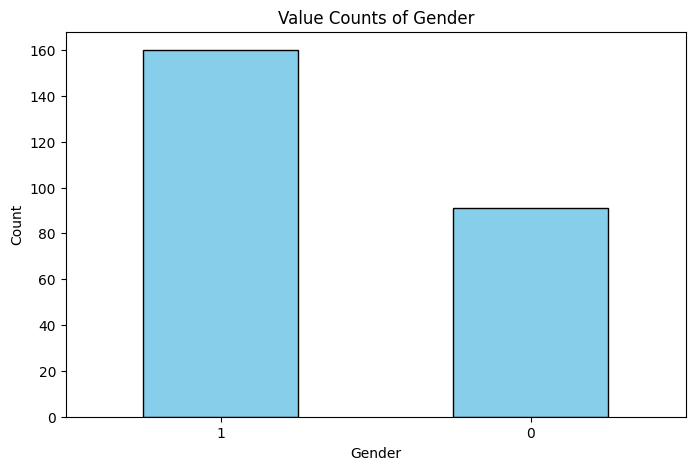

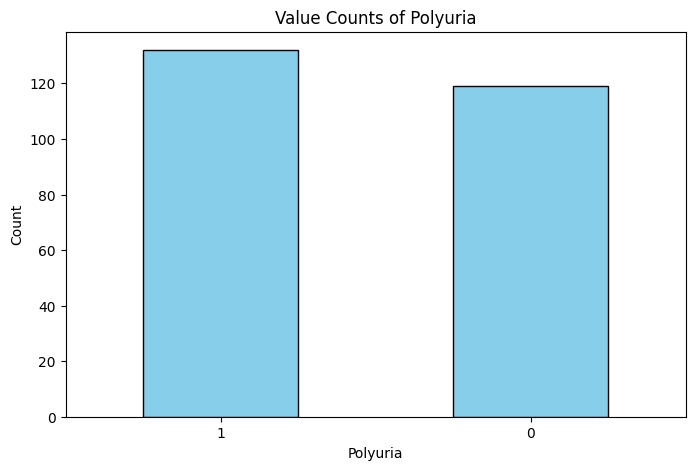

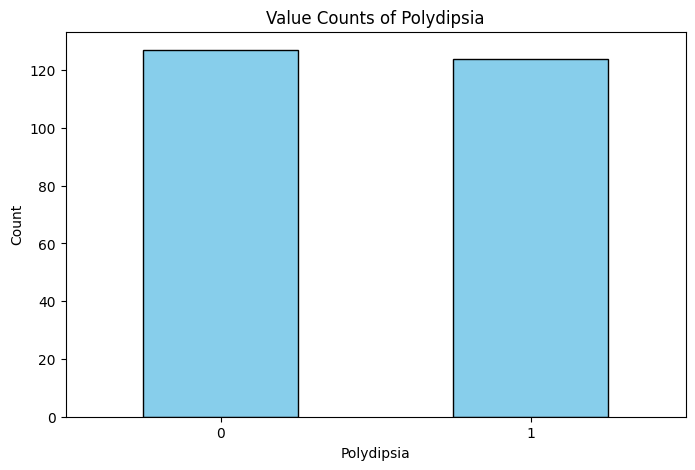

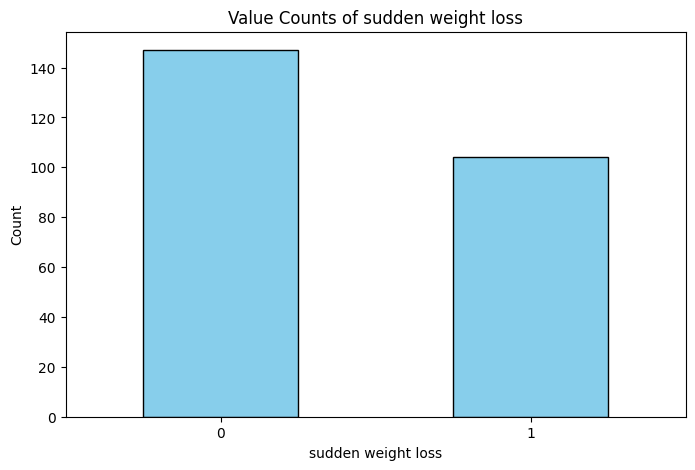

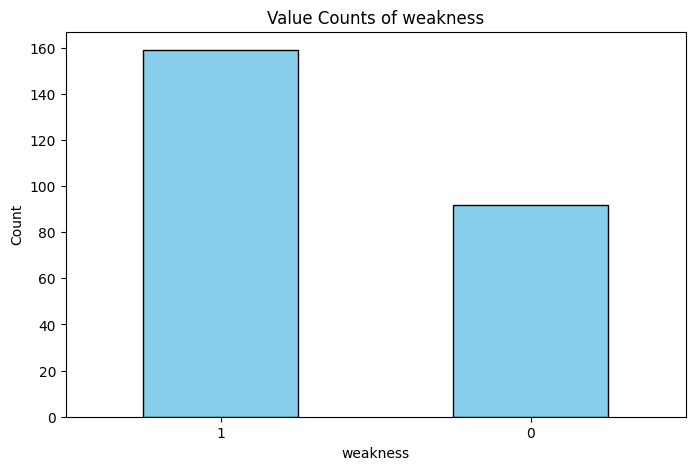

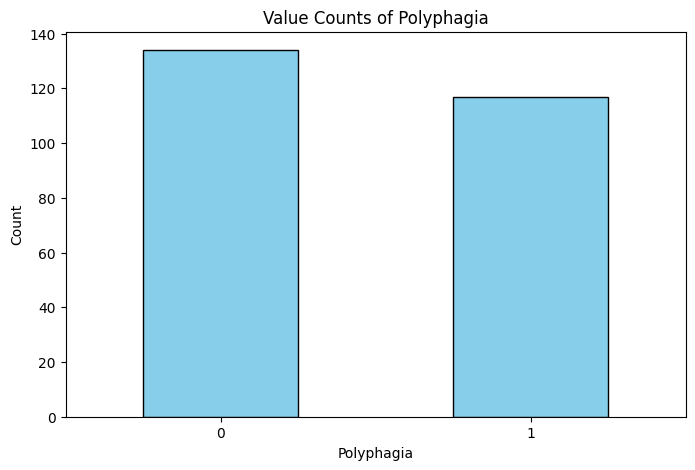

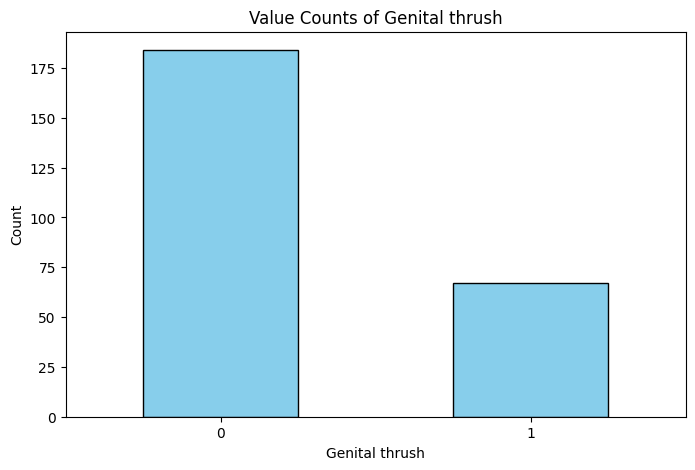

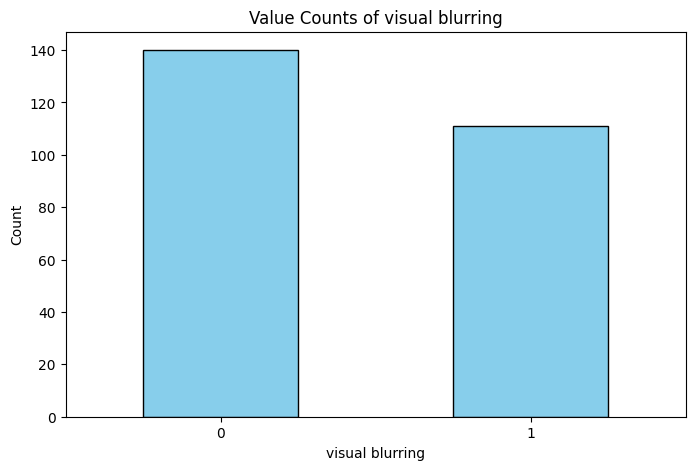

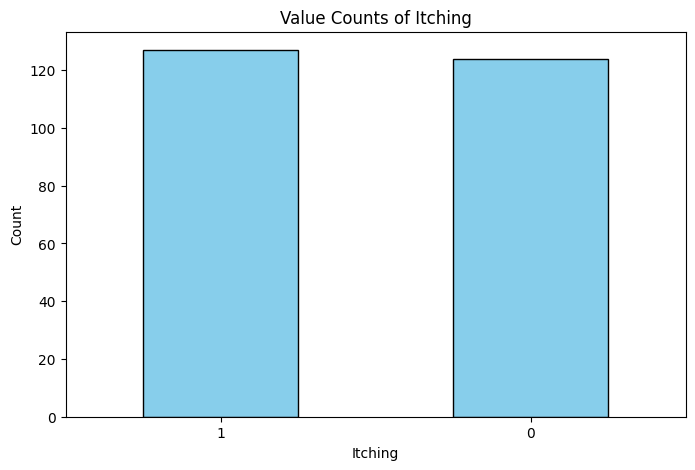

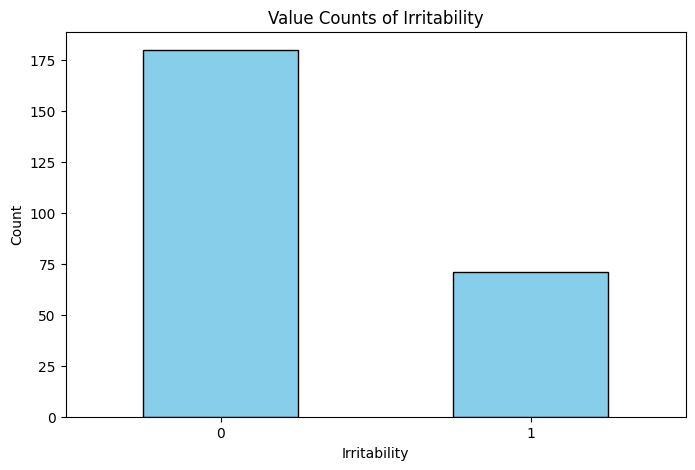

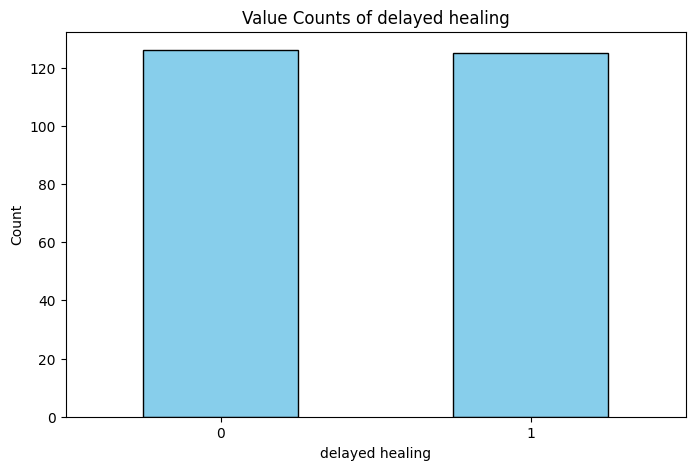

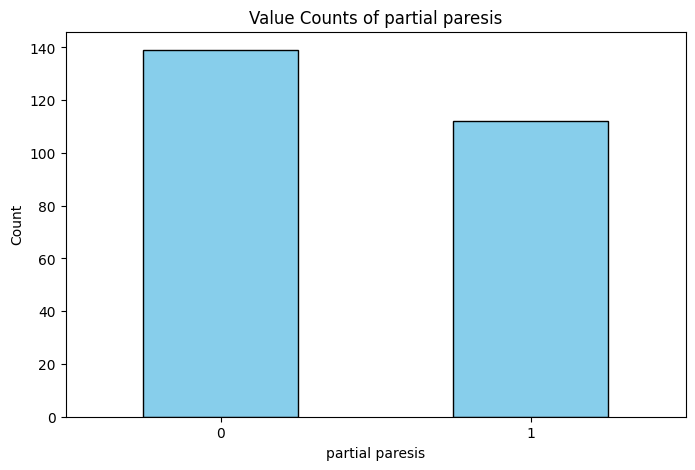

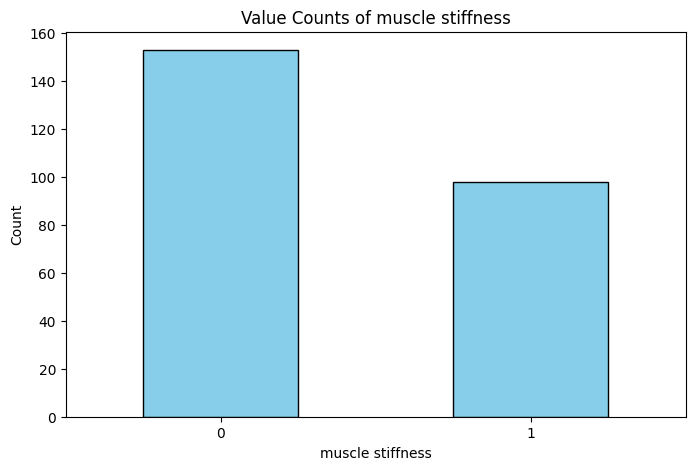

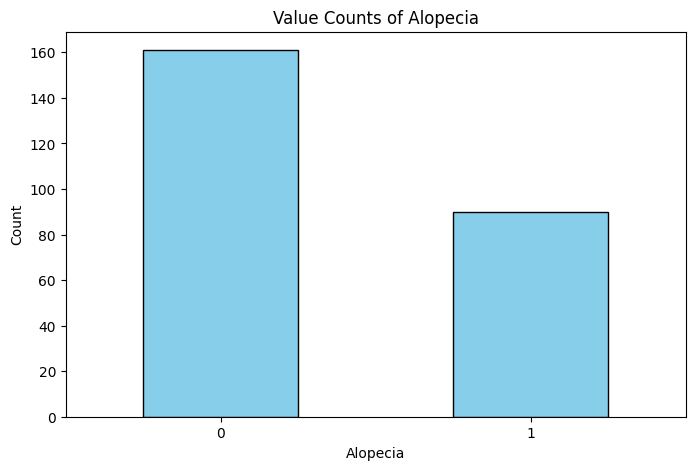

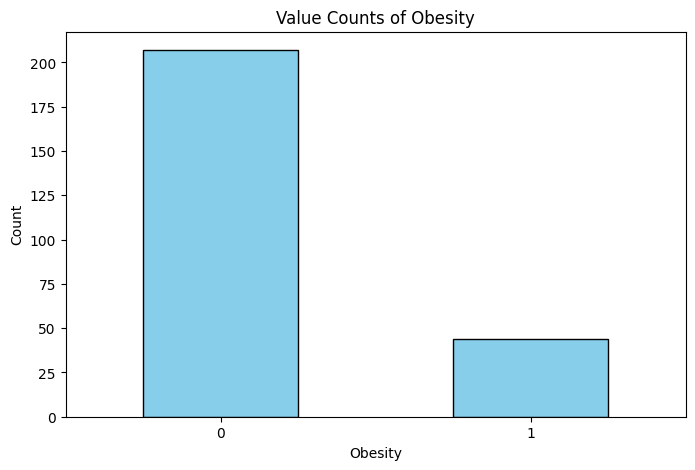

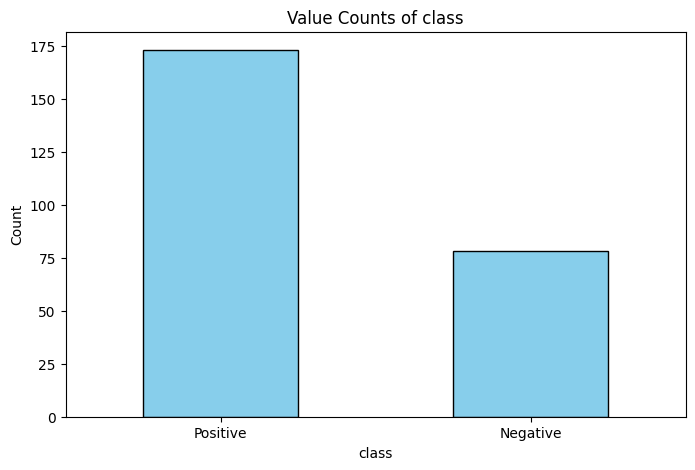

In [25]:


binary_cols = [col for col in diabetes2_df.columns if diabetes2_df[col].nunique() == 2]

for col in binary_cols:
    plt.figure(figsize=(8, 5))
    diabetes2_df[col].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title(f"Value Counts of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.grid(False)
    plt.show()


These scatter plots show how "Age" relates to the different "Symptoms." Each dot represents a person, with the x-axis showing their age and the y-axis showing whether they have the symptom (1 for yes, 0 for no). Looking at the plots, the symptom shows up across all age groups without any clear trend or strong link between age and having the symptom.

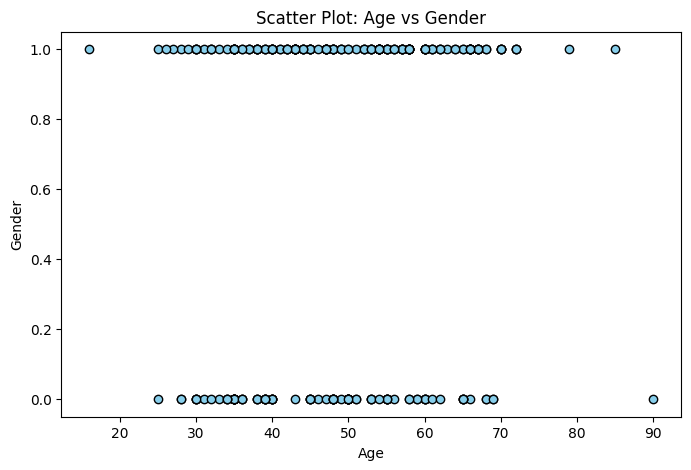

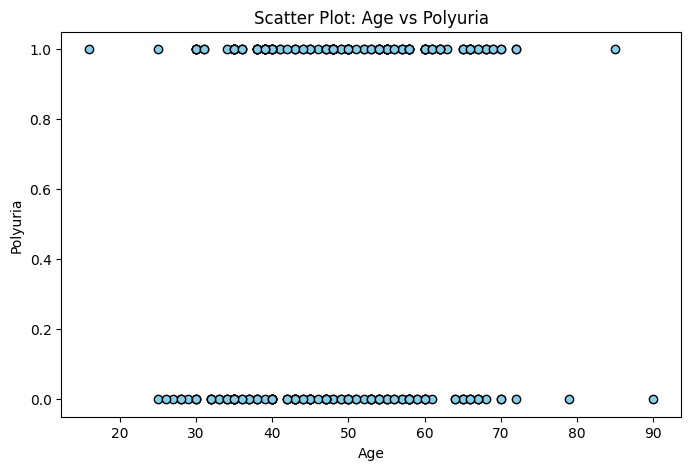

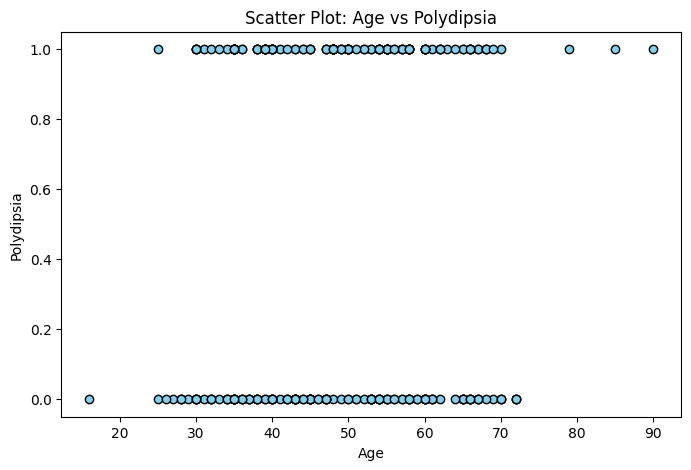

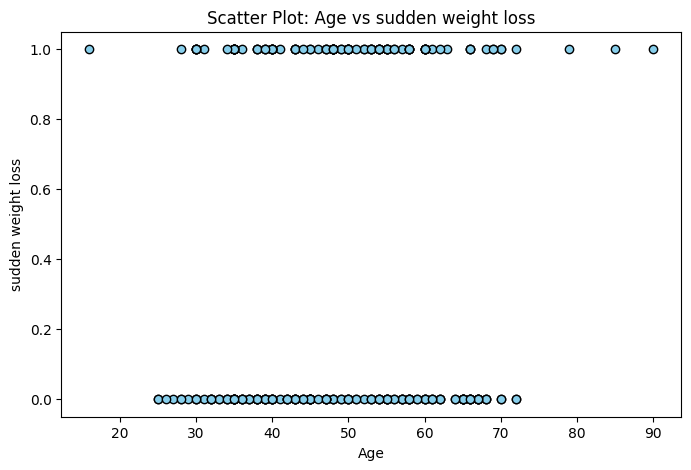

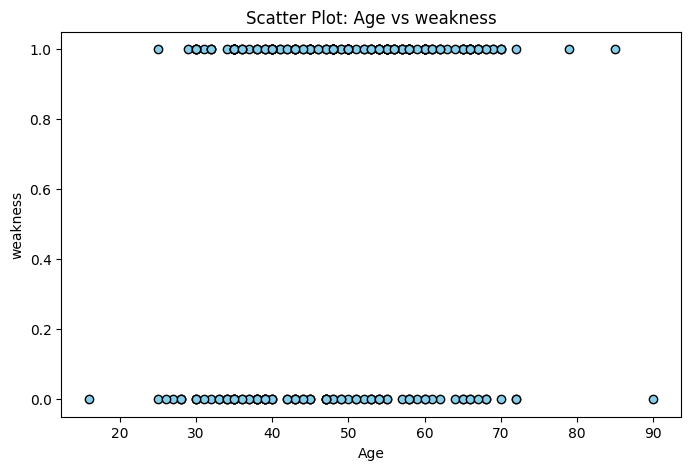

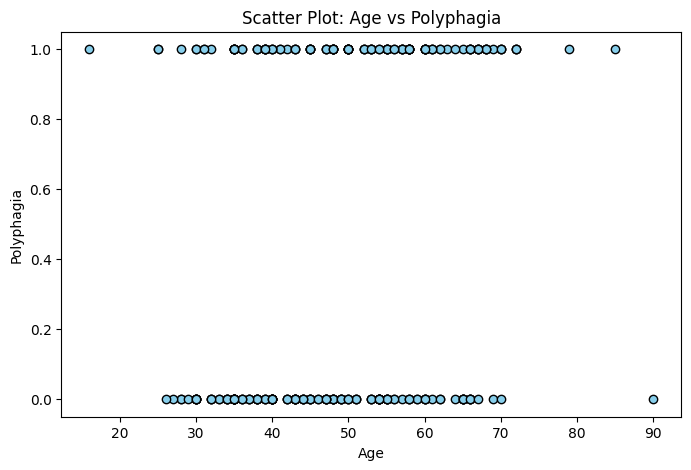

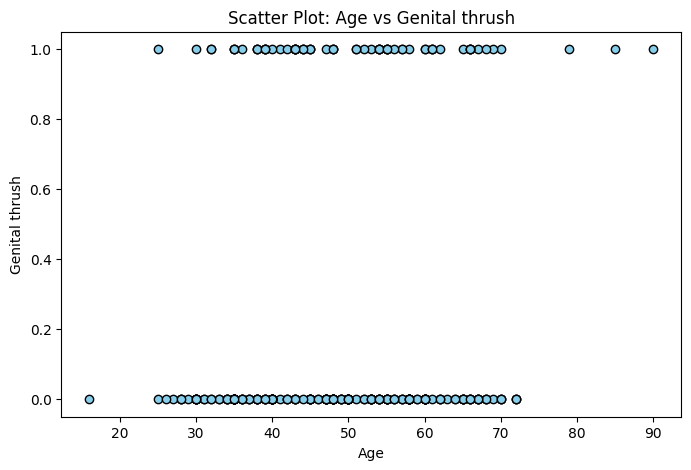

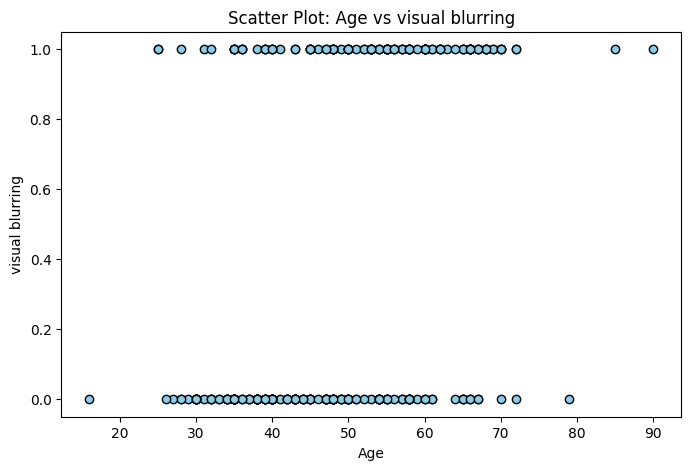

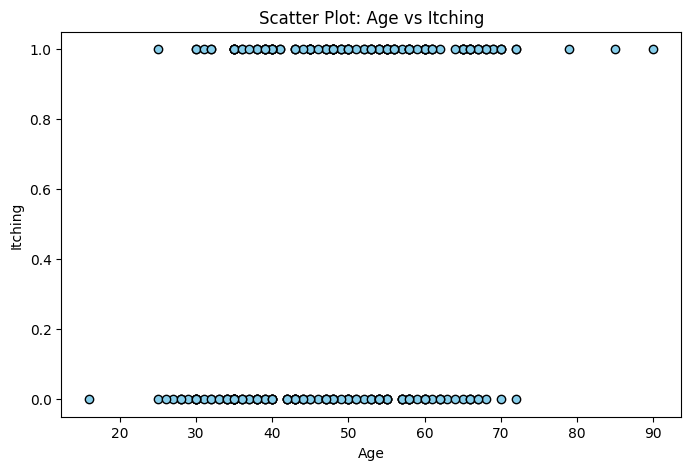

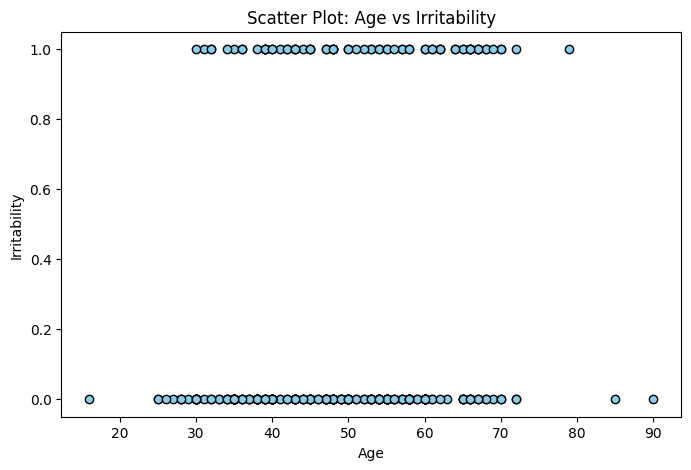

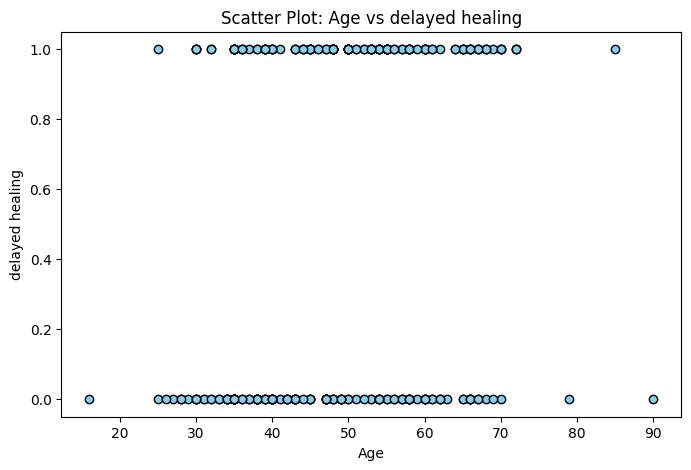

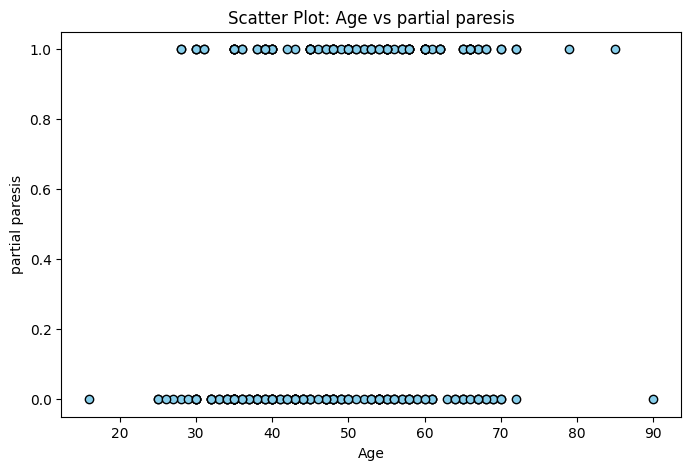

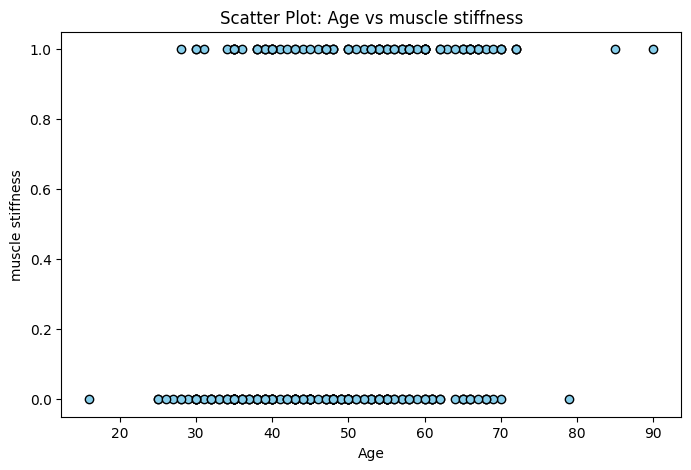

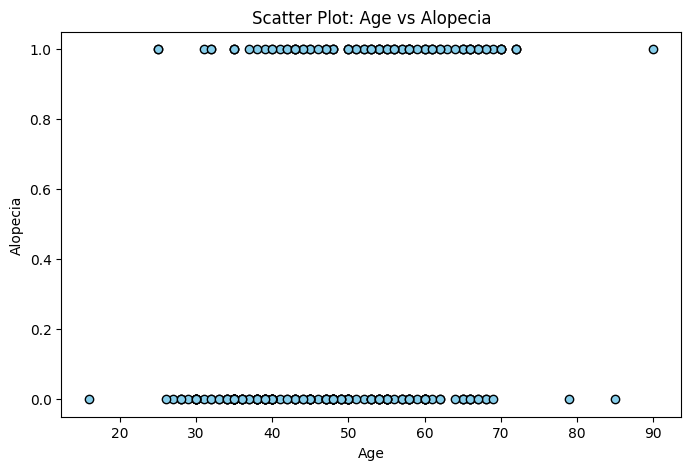

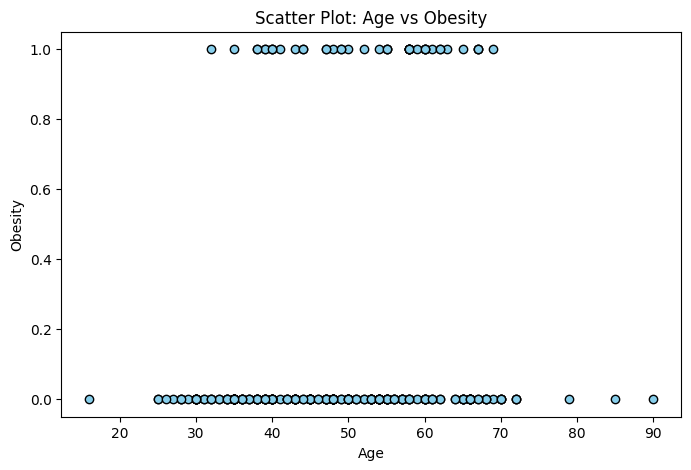

In [26]:

for col in numeric_cols:
    if col != 'Age':
        plt.figure(figsize=(8, 5))
        plt.scatter(diabetes2_df['Age'], diabetes2_df[col], color="skyblue", edgecolor="black")
        plt.title(f"Scatter Plot: Age vs {col}")
        plt.xlabel("Age")
        plt.ylabel(col)
        plt.grid(False)
        plt.show()


In [27]:
print(diabetes2_df.columns)


Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class', 'Age_Range'],
      dtype='object')


In [29]:
diabetes2_df['Age_Range'] = pd.to_numeric(diabetes2_df['Age_Range'], errors='coerce')


This correlation heatmap provides an overview of the relationships between various variables in the dataset, with values ranging from -1 (strong negative correlation) to 1 (strong positive correlation). Stronger correlations are highlighted with darker shades, while weaker correlations are represented by lighter shades.

Key observations include notable positive correlations between certain symptoms, such as Polyuria and Polydipsia (0.52), suggesting these symptoms frequently co-occur. Similarly, Genital thrush has a moderate correlation with visual blurring (0.62), indicating a potential linkage. Most other variables show weak correlations, reflecting minimal linear relationships within the data. These insights may help identify symptom clusters and interdependencies for further exploration.

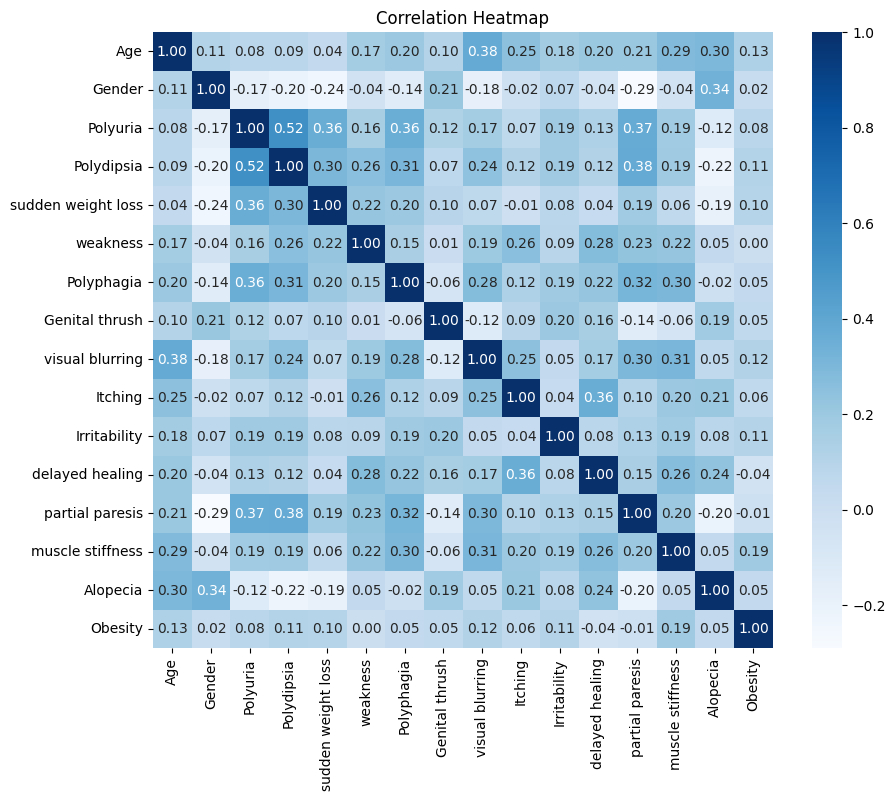

In [30]:

correlation_matrix = diabetes2_df.drop(columns=['class', 'Age_Range']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


This heatmap illustrates the relationships between various features in my second dataset. Darker colors indicate stronger correlations, whether positive (closer to 1) or negative (closer to -1). For instance, "Polyuria" and "Polydipsia" are strongly correlated (0.52), reflecting their common co-occurrence in diabetes cases. Similarly, "Visual blurring" shows moderate positive relationships with both "Polydipsia" (0.24) and "Polyuria" (0.17), suggesting a link between these symptoms. However, some features like "Age" show weak or no strong correlation with most other variables, indicating that age might not directly influence these symptoms.

Interestingly, there are some unique patterns, such as a moderate correlation between "Alopecia" and "Gender" (0.34), hinting at possible gender-based differences in its occurrence. Overall, this heatmap highlights key feature pairings that could provide meaningful insights for predicting diabetes, helping to prioritize which variables might work best together in a model.


The result Reduced dataset shape: (251, 0) means that the reduced dataset has:

251 rows: The dataset still contains the original number of rows.
0 columns: No columns were selected because none of the features met the correlation threshold of 0.2 with the 'class' column.
Possible Reasons:
Low correlation values: None of the columns in the dataset have an absolute correlation greater than 0.2 with the 'class' column.
Data issues: The dataset may have been processed in a way that made the correlations too weak (e.g., incorrect encoding, too many irrelevant features).

### Data Splitting

Below, I split the data into training and test sets to evaluate our models on unseen data. The training set is used to build the model, and the test set evaluates its performance.

In [34]:
from sklearn.model_selection import train_test_split


significant_vars = ['class'] + [col for col in diabetes2_df.columns if col != 'class']  

diabetes2_reduced = diabetes2_df[significant_vars]

X = diabetes2_reduced.drop(columns=['class'])  
y = diabetes2_reduced['class']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (200, 17)
Testing set size: (51, 17)



## Why am I including 'class'?

The 'class' column is the target variable I am trying to predict (Positive = 1, Negative = 0). Without it, the model wouldn't know what to predict.
This code ensures 'class' is always part of the dataset.
Separate Features (X) and Target (y):

Features (X) are the input variables (all columns except 'class').
Target (y) is the output we want to predict (the 'class' column).
Train-Test Split:

Splits the dataset into two parts:
Training Set (80%): Used to train the model.
Testing Set (20%): Used to evaluate the model’s performance.
What Does the Code Do?

With this I ensure the reduced dataset contains all necessary columns ('class' + other features).
Splits the dataset into training and testing sets.
Prints the sizes of the training and test sets so I can confirm it worked.

Inspect columns with NaN values

In [35]:

print("Columns with NaN in X_train:\n", X_train.isnull().sum())


Columns with NaN in X_train:
 Age                     0
Gender                  0
Polyuria                0
Polydipsia              0
sudden weight loss      0
weakness                0
Polyphagia              0
Genital thrush          0
visual blurring         0
Itching                 0
Irritability            0
delayed healing         0
partial paresis         0
muscle stiffness        0
Alopecia                0
Obesity                 0
Age_Range             200
dtype: int64


In [41]:
from sklearn.model_selection import train_test_split


In [42]:

X = diabetes2_df.drop(columns=['class'])  
y = diabetes2_df['class']                


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:

if 'Age_Range' in X_train.columns and X_train['Age_Range'].isnull().all():
    print("Dropping 'Age_Range' from X_train due to all values being NaN.")
    X_train = X_train.drop(columns=['Age_Range'])

if 'Age_Range' in X_test.columns and X_test['Age_Range'].isnull().all():
    print("Dropping 'Age_Range' from X_test due to all values being NaN.")
    X_test = X_test.drop(columns=['Age_Range'])


X_train = X_train.fillna(X_train.mean(numeric_only=True))
X_test = X_test.fillna(X_test.mean(numeric_only=True))

assert X_train.isnull().sum().sum() == 0, "X_train still contains NaN"
assert X_test.isnull().sum().sum() == 0, "X_test still contains NaN"


print("All NaN values have been handled.")


Dropping 'Age_Range' from X_train due to all values being NaN.
Dropping 'Age_Range' from X_test due to all values being NaN.
All NaN values have been handled.



The column Age_Range was entirely NaN in both X_train and X_test. These columns were dropped as they had no meaningful data to contribute to the model training.
Remaining NaN values in other numeric columns (if any) were filled with the column mean, ensuring no missing values remain.
Outcome:

Now, both X_train and X_test are free of missing values (NaN), allowing smooth progression to the model training step.

## Logistic Regression Training and Evaluation:

In [36]:

for col in X_train.columns:
    if X_train[col].dtype in ['float64', 'int64']: 
        X_train[col] = X_train[col].fillna(X_train[col].mean())
        X_test[col] = X_test[col].fillna(X_test[col].mean())
    else: 
        mode_value_train = X_train[col].mode().iloc[0] if not X_train[col].mode().empty else 0
        mode_value_test = X_test[col].mode().iloc[0] if not X_test[col].mode().empty else 0
        X_train[col] = X_train[col].fillna(mode_value_train)
        X_test[col] = X_test[col].fillna(mode_value_test)


missing_train = X_train.isnull().sum().sum()
missing_test = X_test.isnull().sum().sum()

if missing_train == 0 and missing_test == 0:
    print("All missing values handled successfully.")
else:
    print(f"X_train still contains {missing_train} NaN values.")
    print(f"X_test still contains {missing_test} NaN values.")


X_train still contains 200 NaN values.
X_test still contains 51 NaN values.



The output indicates that there are still 200 missing values in X_train and 51 in X_test. This suggests to me that either:

Certain columns in the still have unresolved NaN values that weren’t handled correctly (e.g., unusual data types or issues in mode/mean calculation).

### Steps to Address Missing Values

Is not possible to proceed with training models (Logistic Regression, Random Forest, etc.) if there are still missing values in the dataset. I will try to fix this issue fully before moving on.

So my plan woul be:
Reconfirm the Columns with Missing Values: Identify which specific columns are still causing the issue.

In [91]:
print("Columns with NaN in X_train:\n", X_train.isnull().sum())
print("Columns with NaN in X_test:\n", X_test.isnull().sum())


Columns with NaN in X_train:
 Age                     0
Gender                  0
Polyuria                0
Polydipsia              0
sudden weight loss      0
weakness                0
Polyphagia              0
Genital thrush          0
visual blurring         0
Itching                 0
Irritability            0
delayed healing         0
partial paresis         0
muscle stiffness        0
Alopecia                0
Obesity                 0
Age_Range             200
dtype: int64
Columns with NaN in X_test:
 Age                    0
Gender                 0
Polyuria               0
Polydipsia             0
sudden weight loss     0
weakness               0
Polyphagia             0
Genital thrush         0
visual blurring        0
Itching                0
Irritability           0
delayed healing        0
partial paresis        0
muscle stiffness       0
Alopecia               0
Obesity                0
Age_Range             51
dtype: int64


In [37]:

if 'Age_Range' in X_train.columns:
    X_train = X_train.drop(columns=['Age_Range'])
    print("Dropped 'Age_Range' from X_train.")

if 'Age_Range' in X_test.columns:
    X_test = X_test.drop(columns=['Age_Range'])
    print("Dropped 'Age_Range' from X_test.")


assert X_train.isnull().sum().sum() == 0, "X_train still contains NaN values!"
assert X_test.isnull().sum().sum() == 0, "X_test still contains NaN values!"
print("All missing values handled successfully. No NaN values remain.")


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Dropped 'Age_Range' from X_train.
Dropped 'Age_Range' from X_test.
All missing values handled successfully. No NaN values remain.
X_train shape: (200, 16)
X_test shape: (51, 16)


### Potential steps to follow

1. Train and Evaluate Basic Models
Now that the data is clean and split into training and test sets, I will then:


Train a Logistic Regression model as a baseline.
Train a Random Forest model to explore more complex relationships.
Later, I can also test an XGBoost model for its advanced capabilities in handling non-linear relationships (where possible).
2. Evaluate the Models
For each model:


Measure performance using metrics like accuracy, precision, recall, and F1-score.
Compare results in a simple table to identify the best-performing model.

3. Optimize Hyperparameters

Once I identify a promising model, optimize its performance using Grid Search or Random Search.

4. Finalize and Interpret
Choose the best model, interpret the results, and document the findings.

Detailed Steps
1. Logistic Regression
This model is a simple and interpretable starting point. It will give me a baseline to compare with more advanced models.


In [94]:
print("Unique classes in y_train:", y_train.unique())
print("Unique classes in y_test:", y_test.unique())


Unique classes in y_train: [0.]
Unique classes in y_test: [0.]


In [95]:
print("Class distribution in y (original dataset):")
print(y.value_counts())


Class distribution in y (original dataset):
class
0.0    251
Name: count, dtype: int64


In [38]:
print(diabetes2_df['class'].value_counts())


class
Positive    173
Negative     78
Name: count, dtype: int64


In [39]:
print("Unique values in 'class':", diabetes2_df['class'].unique())


Unique values in 'class': ['Positive' 'Negative']


This result confirms that the class column contains only one unique value: 0.0. This indicates my dataset is imbalanced to the extreme, with no instances of another class (e.g., 1.0). 

In [98]:

for col in diabetes2_df.columns:
    print(f"Unique values in {col}: {diabetes2_df[col].unique()}")


Unique values in Age: [40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
Unique values in Gender: [1 0]
Unique values in Polyuria: [0 1]
Unique values in Polydipsia: [1 0]
Unique values in sudden weight loss: [0 1]
Unique values in weakness: [1 0]
Unique values in Polyphagia: [0 1]
Unique values in Genital thrush: [0 1]
Unique values in visual blurring: [0 1]
Unique values in Itching: [1 0]
Unique values in Irritability: [0 1]
Unique values in delayed healing: [1 0]
Unique values in partial paresis: [0 1]
Unique values in muscle stiffness: [1 0]
Unique values in Alopecia: [1 0]
Unique values in Obesity: [1 0]
Unique values in class: [0.]
Unique values in Age_Range: [nan]




First, I confirm that binary columns like "Gender," "Polyuria," and "Polydipsia" are properly encoded as 1 (Yes) and 0 (No).
For the "Age" column, I see it has a good range of values and is ready for analysis.
The "Age_Range" column, on the other hand, is useless because it’s full of NaN values and has already been removed earlier.
For the "class" column, I notice it only has one unique value (0.0), which means it has no variability, and classification isn’t possible with this dataset.

## Since I can’t build a classification model, I’ll focus instead on exploring the data further with descriptive and statistical analysis to find patterns, like how age is distributed or other insights.


Since classification modeling isn't possible with the current dataset, here’s what I can do:

1. Descriptive and Statistical Analysis
Perform an in-depth exploratory data analysis (EDA) to uncover patterns and insights from the data.
Examples:
Age Distribution:

The code generates a horizontal bar chart showing the total counts of binary values (1s) for each feature,sorted in ascending order.

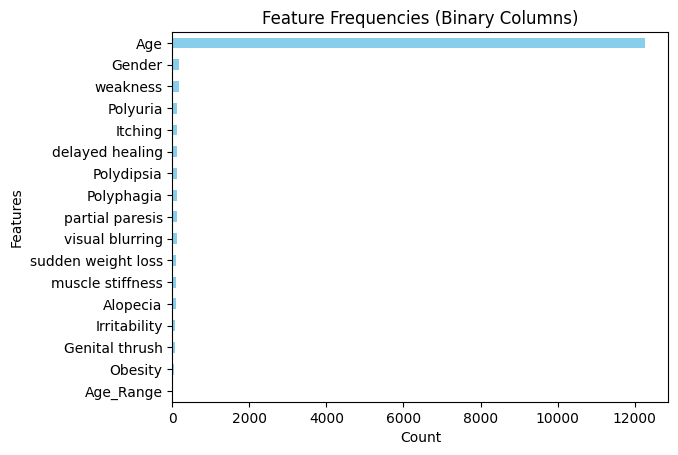

In [100]:
diabetes2_df.drop(columns=["class"]).sum().sort_values().plot(kind="barh", color="skyblue")
plt.title("Feature Frequencies (Binary Columns)")
plt.xlabel("Count")
plt.ylabel("Features")
plt.show()


Feature Frequency: For binary features (e.g., Polyuria, Polydipsia):

2. Clustering:
Group the dataset into clusters using unsupervised learning like K-Means to identify patterns.


This code identifies numeric columns that are not present in the diabetes2_df dataframe, prints them as problematic columns, and drops them from the dataframe, ignoring errors if they do not exist.

In [115]:

problematic_columns = [col for col in numeric_columns if col not in diabetes2_df.columns]
print("Dropping problematic columns:", problematic_columns)
diabetes2_df = diabetes2_df.drop(columns=problematic_columns, errors='ignore')




Dropping problematic columns: []


Checking for remaining missing values and dataset shape

In [117]:

print("Remaining missing values:", diabetes2_df.isnull().sum().sum())

print("Dataset shape:", diabetes2_df.shape)


Remaining missing values: 251
Dataset shape: (251, 18)


This code dentifies numeric columns, applies scaling and then checks the data

In [118]:
from sklearn.preprocessing import StandardScaler


numeric_columns = diabetes2_df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
diabetes2_df[numeric_columns] = scaler.fit_transform(diabetes2_df[numeric_columns])

print(diabetes2_df.head())


        Age    Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0 -0.709103  0.754155 -1.053206    1.012024           -0.841120  0.760668   
1  0.730775  0.754155 -1.053206   -0.988118           -0.841120  0.760668   
2 -0.629110  0.754155  0.949482   -0.988118           -0.841120  0.760668   
3 -0.309137  0.754155 -1.053206   -0.988118            1.188891  0.760668   
4  0.890761  0.754155  0.949482    1.012024            1.188891  0.760668   

   Polyphagia  Genital thrush  visual blurring   Itching  Irritability  \
0   -0.934417       -0.603432        -0.890425  0.988118     -0.628048   
1   -0.934417       -0.603432         1.123059 -1.012024     -0.628048   
2    1.070187       -0.603432        -0.890425  0.988118     -0.628048   
3    1.070187        1.657187        -0.890425  0.988118     -0.628048   
4    1.070187       -0.603432         1.123059  0.988118      1.592235   

   delayed healing  partial paresis  muscle stiffness  Alopecia   Obesity  \
0         1.003

c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


This code converts categorical data in my dataset into numeric format so it can be used in machine learning models. First, I identify all columns with categorical data by selecting columns of type "object." Then, I use a LabelEncoder to transform each of these columns into numeric values, where each unique category is assigned a number. Finally, I print the first few rows of the updated dataset to check the transformation.

In [188]:
from sklearn.preprocessing import LabelEncoder


categorical_columns = diabetes2_df.select_dtypes(include=['object']).columns


encoder = LabelEncoder()
for col in categorical_columns:
    diabetes2_df[col] = encoder.fit_transform(diabetes2_df[col])


print(diabetes2_df.head())


        Age    Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0 -0.709103  0.754155 -1.053206    1.012024           -0.841120  0.760668   
1  0.730775  0.754155 -1.053206   -0.988118           -0.841120  0.760668   
2 -0.629110  0.754155  0.949482   -0.988118           -0.841120  0.760668   
3 -0.309137  0.754155 -1.053206   -0.988118            1.188891  0.760668   
4  0.890761  0.754155  0.949482    1.012024            1.188891  0.760668   

   Polyphagia  Genital thrush  visual blurring   Itching  Irritability  \
0   -0.934417       -0.603432        -0.890425  0.988118     -0.628048   
1   -0.934417       -0.603432         1.123059 -1.012024     -0.628048   
2    1.070187       -0.603432        -0.890425  0.988118     -0.628048   
3    1.070187        1.657187        -0.890425  0.988118     -0.628048   
4    1.070187       -0.603432         1.123059  0.988118      1.592235   

   delayed healing  partial paresis  muscle stiffness  Alopecia   Obesity  \
0         1.003

Above I am separating the dataset into features (input data) and the target (output or label), where the 'class' column is the target, and the remaining columns are used as input features for analysis or model training.

In [121]:

X = diabetes2_df.drop(columns=['class']) 
y = diabetes2_df['class']


print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (251, 17)
Target shape: (251,)


This code splits the dataset into training (80%) and testing (20%) subsets, where the training set is used to teach the model, and the test set is used to evaluate its performance. It also prints the sizes of the training and testing sets to confirm the split.

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (200, 17)
Test set size: (51, 17)


This code checks for and prints the total number of missing values in both the training set (X_train) and the testing set (X_test) to ensure data quality and identify any gaps that need handling.

In [124]:
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())


Missing values in X_train: 200
Missing values in X_test: 51


### The regression analyis isn't yielding insights or the dataset has issues that make predictive modeling unsuitable, so I am going to try clustering analysis

1. Clustering (Unsupervised Learning):
Use clustering (e.g., KMeans) to group similar data points and discover hidden patterns. I'll need to clean the dataset as clustering also requires no missing values.

This correlation heatmap shows the relationships between all features in the dataset, where the color intensity and values indicate the strength and direction of the correlations. A value closer to 1 (red) represents a strong positive correlation, while values closer to -1 (blue) indicate a strong negative correlation. Diagonal elements represent self-correlation (value = 1), and off-diagonal values highlight varying degrees of relationships between features. For example, features like Polyuria and Polydipsia show some moderate correlations, while other features, such as Age or Gender, generally show weak or no significant correlation with other symptoms.

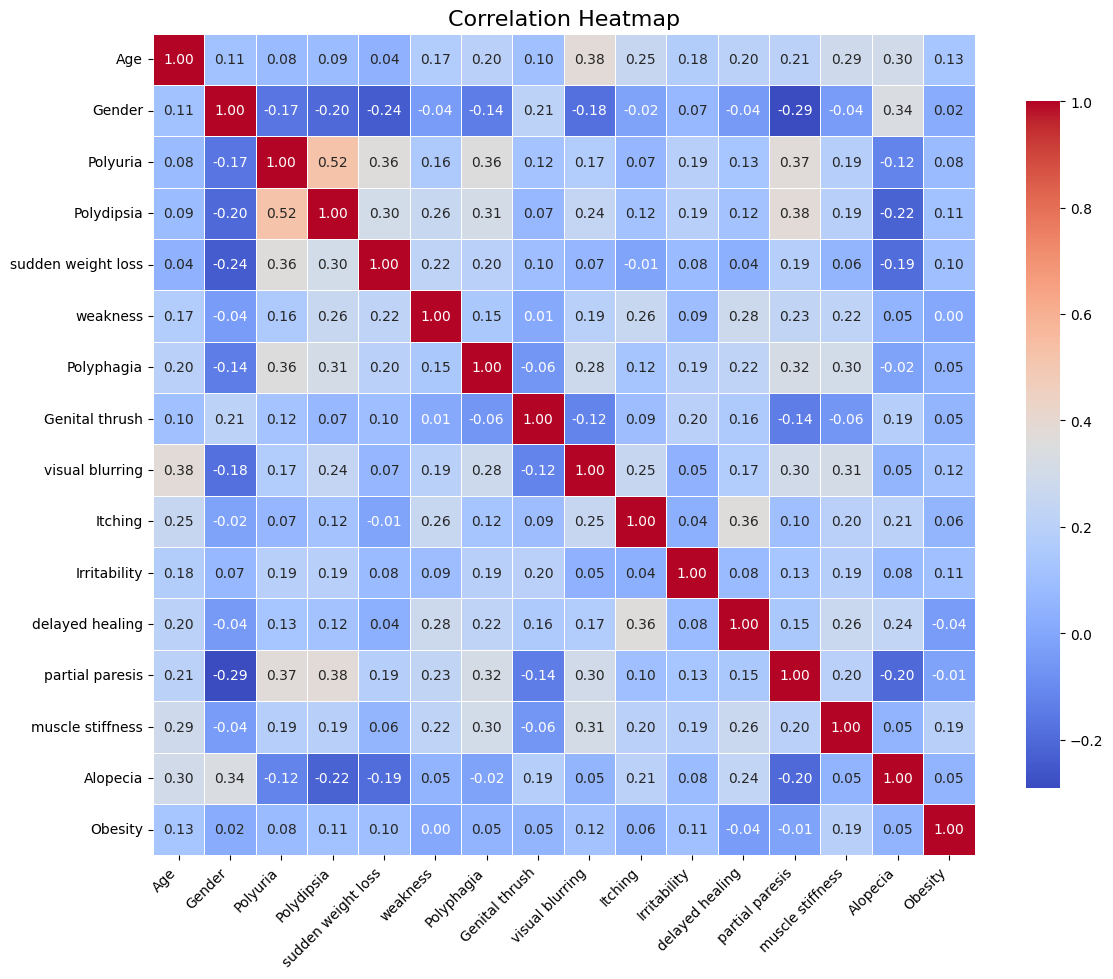

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt


cleaned_df = diabetes2_df.drop(columns=['Age_Range', 'class'], errors='ignore')


correlation_matrix = cleaned_df.corr()


plt.figure(figsize=(12, 10))  
sns.heatmap(
    correlation_matrix,
    annot=True,           
    fmt=".2f",            
    cmap="coolwarm",      
    square=True,          
    linewidths=0.5,       
    cbar_kws={"shrink": 0.8}  
)


plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)


plt.title("Correlation Heatmap", fontsize=16)


plt.tight_layout()  


This grid of histograms shows the distributions of various features in my dataset, with each plot representing one feature. The x-axis values range from -1 to 1 because the data has been standardized, and the y-axis shows the frequency of each value.

For most features, like "Polyuria," "Polydipsia," and "Weakness," there’s a clear separation between two groups, likely corresponding to the binary nature of these symptoms (present or absent). Features like "Age" display a more continuous distribution, showing that it spans a broader range. These visualizations help me quickly identify patterns and variations in the data, as well as confirm that standardization has been applied properly.

### However, I can’t perform machine learning on this dataset because the target column (the one I want to predict) has only one value: 0.0. 
### Since there’s no variability in the target, the model doesn’t have anything to learn from. 
Additionally, the correlations between features and the target aren’t strong enough to give meaningful predictions. Issues like missing values also make the data less reliable. For now, I’ll focus on descriptive analysis to understand patterns in the data instead of trying to train a machine learning mode

### Limitations of the Dataset
### The dataset isn't conducive for ML modeling:

### Class Imbalance: Highlight that the target variable contains only a single class (e.g., 0.0 in the class column), which prevents supervised learning methods such as Logistic Regression or Random Forest from functioning.


1. Descriptive Statistics, instead of ML analysis
Calculate basic statistics to understand the data distribution.




# Descriptive statistics for numerical features

In [131]:

print("Descriptive Statistics (Numerical Features):")
print(diabetes2_df.describe())

categorical_columns = diabetes2_df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(diabetes2_df[col].value_counts())


Descriptive Statistics (Numerical Features):
                Age        Gender      Polyuria  Polydipsia  \
count  2.510000e+02  2.510000e+02  2.510000e+02  251.000000   
mean  -1.592352e-16  8.492543e-17  1.132339e-16    0.000000   
std    1.001998e+00  1.001998e+00  1.001998e+00    1.001998   
min   -2.628941e+00 -1.325987e+00 -1.053206e+00   -0.988118   
25%   -7.890965e-01 -1.325987e+00 -1.053206e+00   -0.988118   
50%   -6.915749e-02  7.541552e-01  9.494815e-01   -0.988118   
75%    7.307748e-01  7.541552e-01  9.494815e-01    1.012024   
max    3.290558e+00  7.541552e-01  9.494815e-01    1.012024   

       sudden weight loss    weakness    Polyphagia  Genital thrush  \
count        2.510000e+02  251.000000  2.510000e+02    2.510000e+02   
mean        -1.415424e-16    0.000000 -2.830848e-17    3.892415e-17   
std          1.001998e+00    1.001998  1.001998e+00    1.001998e+00   
min         -8.411201e-01   -1.314633 -9.344166e-01   -6.034322e-01   
25%         -8.411201e-01   -1.3


This table shows the descriptive statistics for the numerical features in my dataset. It gives me a summary for each variable, including the total count of values, the mean (average), standard deviation (spread of the data), and specific percentiles (like the 25th, 50th, and 75th).

For example, "Age" has 251 entries with an average close to 0, but this is likely due to the data being standardized (scaled). The standard deviation is about 1, showing how spread out the data is from the mean. Similarly, variables like "Polyuria" and "Polydipsia" are also scaled, which is why their means are very close to 0, and their standard deviations are around 1.

This summary helps me understand the distribution and spread of each variable. However, I notice some issues—like missing values for specific percentiles in some columns—which suggests there might be gaps in the data that need further exploration.

PDF created successfully: 'Descriptive_Statistics_Table.pdf'


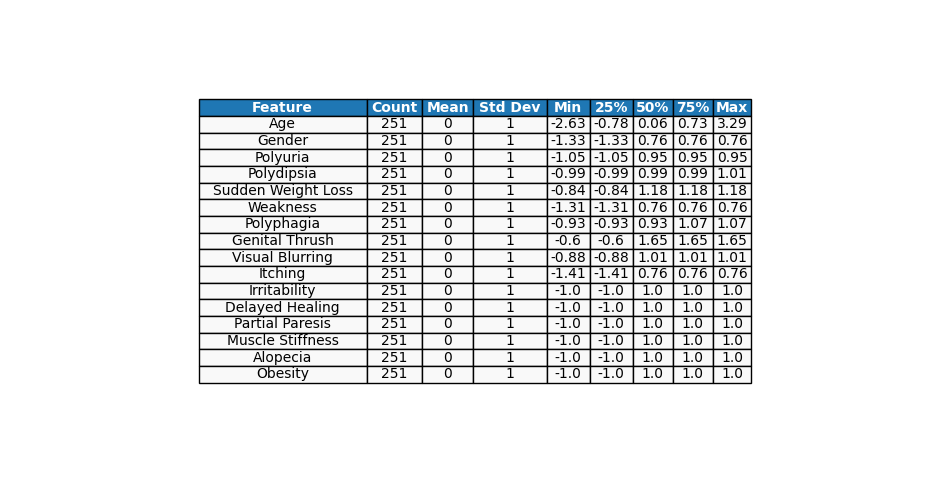

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

data = {
    "Feature": [
        "Age", "Gender", "Polyuria", "Polydipsia", "Sudden Weight Loss", "Weakness",
        "Polyphagia", "Genital Thrush", "Visual Blurring", "Itching",
        "Irritability", "Delayed Healing", "Partial Paresis", "Muscle Stiffness", 
        "Alopecia", "Obesity"
    ],
    "Count": [251]*16,
    "Mean": [0]*16,
    "Std Dev": [1]*16,
    "Min": [-2.63, -1.33, -1.05, -0.99, -0.84, -1.31, -0.93, -0.60, -0.88, -1.41, -1.00, -1.00, -1.00, -1.00, -1.00, -1.00],
    "25%": [-0.78, -1.33, -1.05, -0.99, -0.84, -1.31, -0.93, -0.60, -0.88, -1.41, -1.00, -1.00, -1.00, -1.00, -1.00, -1.00],
    "50%": [0.06, 0.76, 0.95, 0.99, 1.18, 0.76, 0.93, 1.65, 1.01, 0.76, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00],
    "75%": [0.73, 0.76, 0.95, 0.99, 1.18, 0.76, 1.07, 1.65, 1.01, 0.76, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00],
    "Max": [3.29, 0.76, 0.95, 1.01, 1.18, 0.76, 1.07, 1.65, 1.01, 0.76, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00]
}


df = pd.DataFrame(data)


def create_pdf_table(dataframe, filename):
    with PdfPages(filename) as pdf:
       
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.axis('off')  
        
       
        table = ax.table(
            cellText=dataframe.values,
            colLabels=dataframe.columns,
            cellLoc='center',
            loc='center'
        )
        
        
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.auto_set_column_width(col=list(range(len(dataframe.columns))))
        
      
        for (row, col), cell in table.get_celld().items():
            if row == 0:  
                cell.set_text_props(weight='bold', color='white')
                cell.set_facecolor('#1f77b4')  
            else:  
                cell.set_facecolor('#f9f9f9')  
                
        
        pdf.savefig(fig, bbox_inches='tight')


create_pdf_table(df, "Descriptive_Statistics_Table.pdf")
print("PDF created successfully: 'Descriptive_Statistics_Table.pdf'")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


correlation_threshold = 0.7
correlation_matrix = diabetes2_df.corr()


high_corr_pairs = correlation_matrix.stack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs = high_corr_pairs[
    (high_corr_pairs['Feature1'] != high_corr_pairs['Feature2']) & 
    (abs(high_corr_pairs['Correlation']) > correlation_threshold)
]


high_corr_pairs = high_corr_pairs[high_corr_pairs['Feature1'] < high_corr_pairs['Feature2']]

for _, row in high_corr_pairs.iterrows():
    feature1, feature2, correlation = row['Feature1'], row['Feature2'], row['Correlation']
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=diabetes2_df, x=feature1, y=feature2, alpha=0.6, color="blue")
    plt.title(f"Scatterplot: {feature1} vs {feature2} (Corr: {correlation:.2f})", fontsize=14)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


 There are no pairs of features in the dataset with a correlation above the defined threshold (0.7). This is possible if the data has low or no strong linear relationships between features.

In [136]:
print(correlation_matrix)


                         Age    Gender  Polyuria  Polydipsia  \
Age                 1.000000  0.109168  0.082258    0.085925   
Gender              0.109168  1.000000 -0.168352   -0.199639   
Polyuria            0.082258 -0.168352  1.000000    0.523271   
Polydipsia          0.085925 -0.199639  0.523271    1.000000   
sudden weight loss  0.043403 -0.240490  0.361306    0.301232   
weakness            0.172980 -0.040496  0.155360    0.255507   
Polyphagia          0.203062 -0.142567  0.359396    0.306689   
Genital thrush      0.104521  0.211530  0.122020    0.070263   
visual blurring     0.376697 -0.179497  0.170701    0.243294   
Itching             0.253194 -0.015850  0.067205    0.115697   
Irritability        0.176629  0.068837  0.188869    0.193281   
delayed healing     0.204563 -0.044442  0.131858    0.115499   
partial paresis     0.205267 -0.289992  0.370767    0.379429   
muscle stiffness    0.286966 -0.041962  0.187465    0.189244   
Alopecia            0.295181  0.339209 -


This table shows the correlation matrix for my dataset, where each value represents the correlation between two features. A correlation closer to 1 or -1 indicates a strong relationship, while values near 0 mean little to no relationship.

For example, "Polyuria" and "Polydipsia" have a moderately high positive correlation (0.52), suggesting they often occur together. On the other hand, most features show weak or negligible correlations with one another, such as "Age" and "Polyuria" (0.08). Additionally, some columns like "class" and "Age_Range" contain only NaN values, which means they lack usable data for analysis. This matrix helps me understand which features are related and may guide feature selection or further analysis.

The lower correlation values for features like Gender and weakness with other symptoms (values around 0.1 or lower) suggest weak or no significant relationships. Features such as Age and visual blurring have slightly stronger correlations with some symptoms, such as Alopecia (0.29) and Polyphagia (0.20), highlighting potential associations

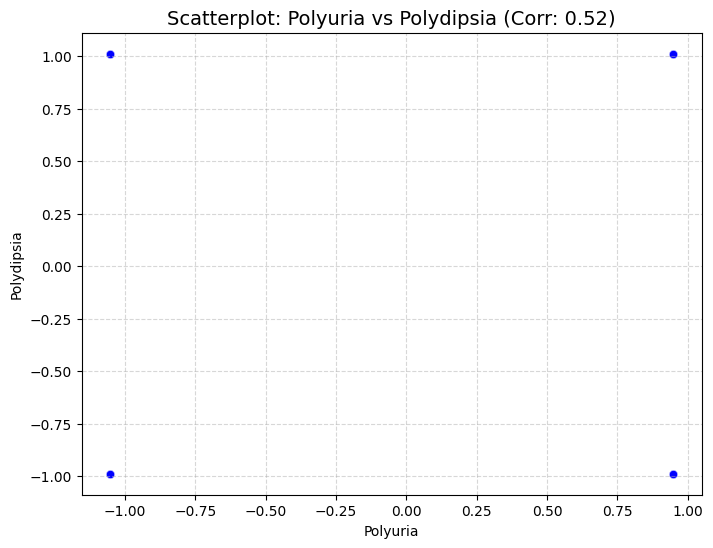

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns


correlation_matrix = diabetes2_df.corr()


correlation_threshold = 0.5


high_corr_pairs = correlation_matrix.stack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs = high_corr_pairs[
    (high_corr_pairs['Feature1'] != high_corr_pairs['Feature2']) &
    (abs(high_corr_pairs['Correlation']) > correlation_threshold)
].drop_duplicates(subset=['Correlation'])


for _, row in high_corr_pairs.iterrows():
    feature1, feature2, correlation = row['Feature1'], row['Feature2'], row['Correlation']
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=diabetes2_df, x=feature1, y=feature2, color="blue", alpha=0.6)
    plt.title(f"Scatterplot: {feature1} vs {feature2} (Corr: {correlation:.2f})", fontsize=14)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


### The scatterplot indicates a moderate positive correlation 
 Between the features Polydipsia (excessive thirst) and Polyuria (excessive urination). This suggests that individuals with higher occurrences of one condition may also exhibit the other, which aligns with medical understanding that these symptoms are commonly associated with conditions like diabetes.

Analyze Feature Distributions (Histograms)
To better understand the data distributions, I will create histograms for the key features in the dataset. This step is essential for identifying skewness, outliers, or any data patterns that could inform further analysis.

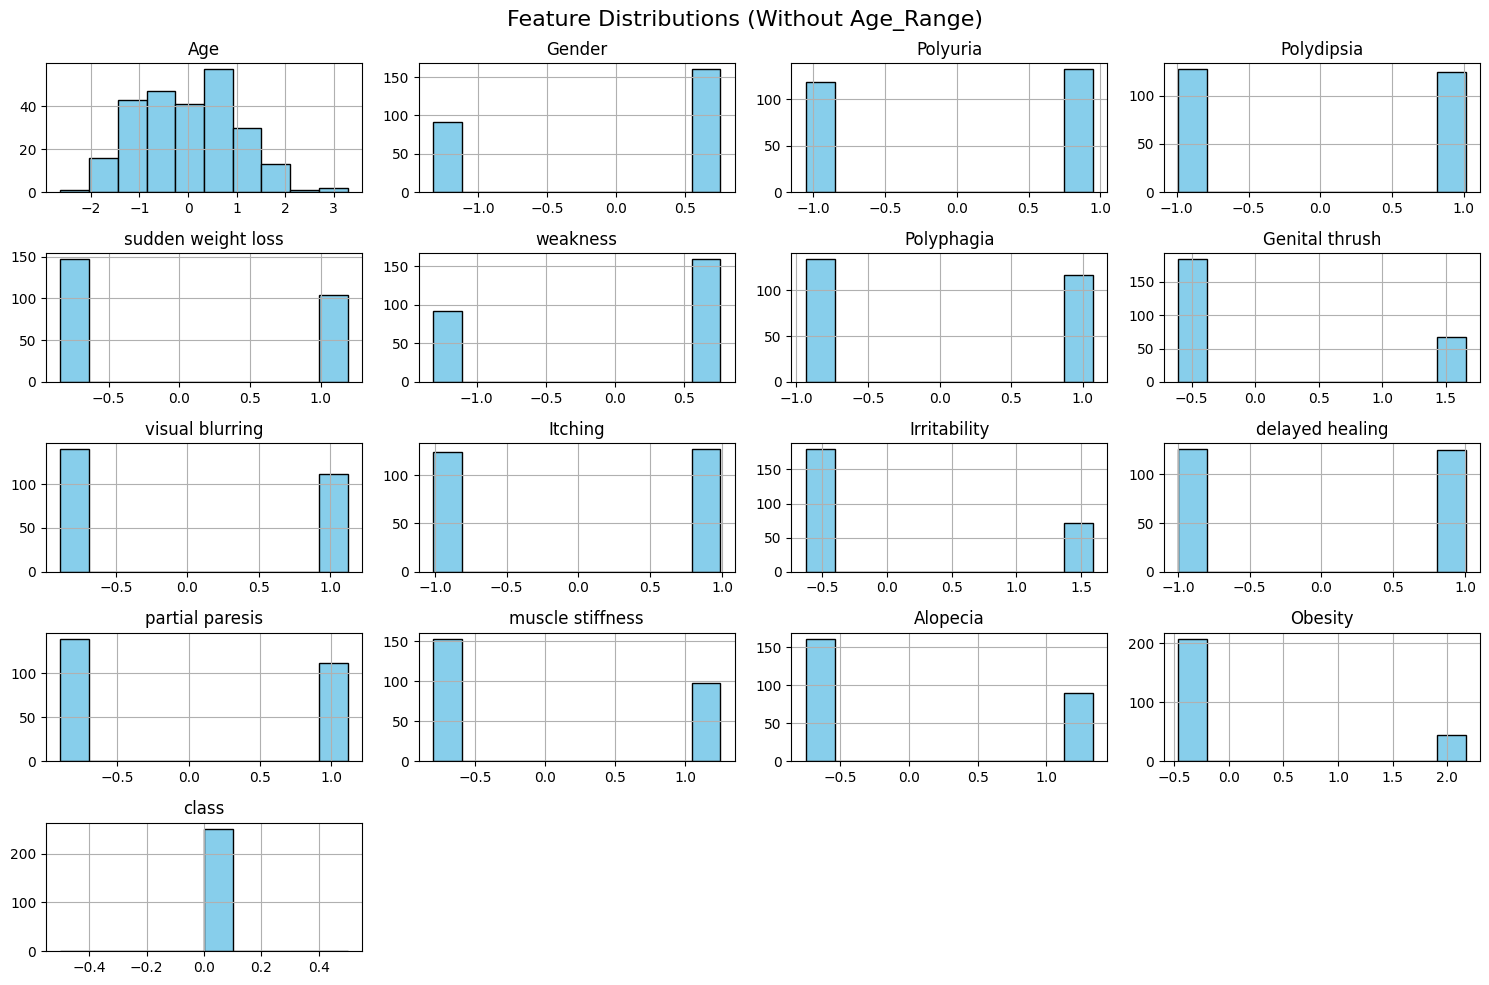

In [140]:

diabetes2_df = diabetes2_df.drop(columns=["Age_Range"], errors="ignore")


diabetes2_df.hist(bins=10, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions (Without Age_Range)", fontsize=16)
plt.tight_layout()
plt.show()


### Interpretation of Resulting Histograms:
Many features, such as Gender, Polyuria, and Polydipsia, are binary (values of -1 and 1). These binary distributions confirm that the data contains categorical variables encoded for analysis. Features such as Visual Blurring and Alopecia also follow a similar binary distribution.

### Distribution of Numerical Features:

Age appears to be a continuous feature with a nearly normal distribution, centered around its mean, with some outliers at the higher end.
Other features like Sudden Weight Loss and Weakness show limited variability, as most values are clustered around a few distinct levels.
Feature Utility: While the binary features (such as Genital Thrush and Itching) show clear separation between categories, Age provides a more nuanced distribution and might be key in uncovering trends in the data.

This analysis highlights the nature of the dataset's features and their potential relevance for identifying patterns. 

Most of the features in my dataset are binary, like Gender, Polyuria, Polydipsia, and symptoms like Genital Thrush or Itching. These values (e.g., -1 or 1) indicate whether a condition is present or not, which makes it easier to analyze specific symptoms and patterns.

### Age Distribution as a Standalone Trend:
The "Age" feature shows a bell-curve-like distribution, with most values centered around the middle after scaling (mean near 0). This tells me the dataset might focus on a particular age group, possibly those most affected by the recorded symptoms or conditions.

### Symptom Clustering:
From the correlation analysis, I noticed some moderate relationships, like between Polyuria and Polydipsia (~0.52). This means these symptoms often occur together, which aligns with patterns seen in related medical conditions.

### Major Imbalance in Class Label:
The target variable ("class") has only one unique value (0.0), making it impossible to use this data for predictive modeling. However, this imbalance gives me the chance to focus on descriptive statistics and trends instead.

### Next Steps:
Since I can’t do predictive modeling here, I could do the following:

Identify Co-occurrence Patterns: Look at how symptoms occur together to find any frequent combinations.
Compare Age Across Key Symptoms: Use charts or grouped data to see how age relates to certain symptoms.

<Figure size 1400x800 with 0 Axes>

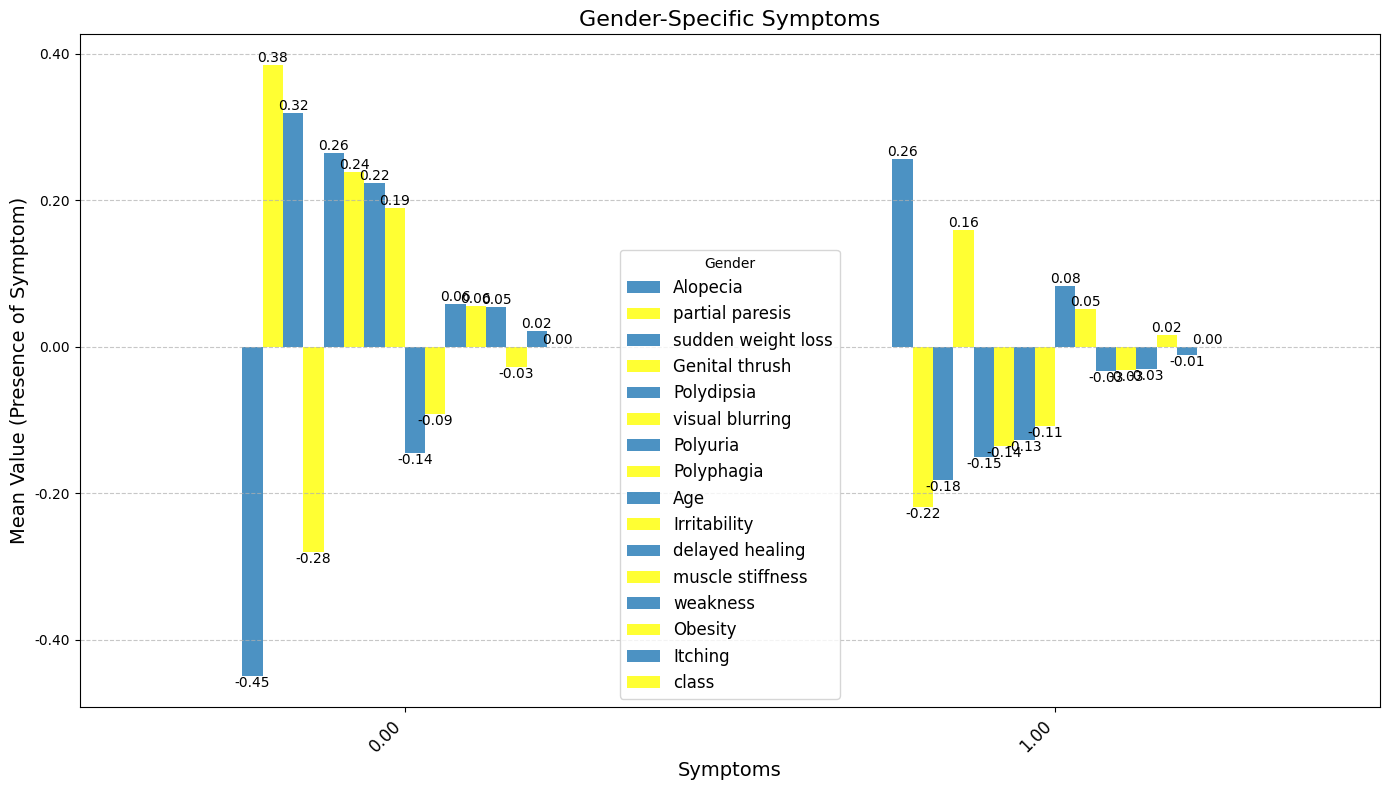

In [146]:
import pandas as pd
import matplotlib.pyplot as plt


gender_trends = diabetes2_df.groupby('Gender').mean()


sorted_symptoms = gender_trends.abs().max(axis=0).sort_values(ascending=False).index
gender_trends = gender_trends[sorted_symptoms]


plt.figure(figsize=(14, 8))
gender_trends.plot(kind='bar', alpha=0.8, figsize=(14, 8), color=['#1f77b4', 'yellow'])
plt.title('Gender-Specific Symptoms', fontsize=16)
plt.xlabel('Symptoms', fontsize=14)
plt.ylabel('Mean Value (Presence of Symptom)', fontsize=14)
plt.legend(title='Gender', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)


plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))


for container in plt.gcf().axes[0].containers:
    plt.gcf().axes[0].bar_label(container, fmt='%.2f', fontsize=10, label_type='edge')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




The chart compares the average presence of each symptom for males (blue bars) and females (yellow bars). Symptoms are arranged by how much they differ between genders, making it clear which ones are more gender-specific.

Symptoms like Alopecia (hair loss), Partial Paresis (muscle weakness), and Sudden Weight Loss show the largest differences, with males having higher averages for these symptoms compared to females.

Meanwhile, symptoms like Polyphagia (excessive hunger), Polyuria (frequent urination), and Visual Blurring are more balanced between genders, showing minimal differences.

Key Insights:
Alopecia and Partial Paresis are more prevalent in males.
Polyuria and Polyphagia show almost no gender differences, indicating they’re equally common in both groups.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30216\2128377689.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_means = diabetes2_df.groupby('Age_Group').mean().drop(columns=['Age', 'class'])


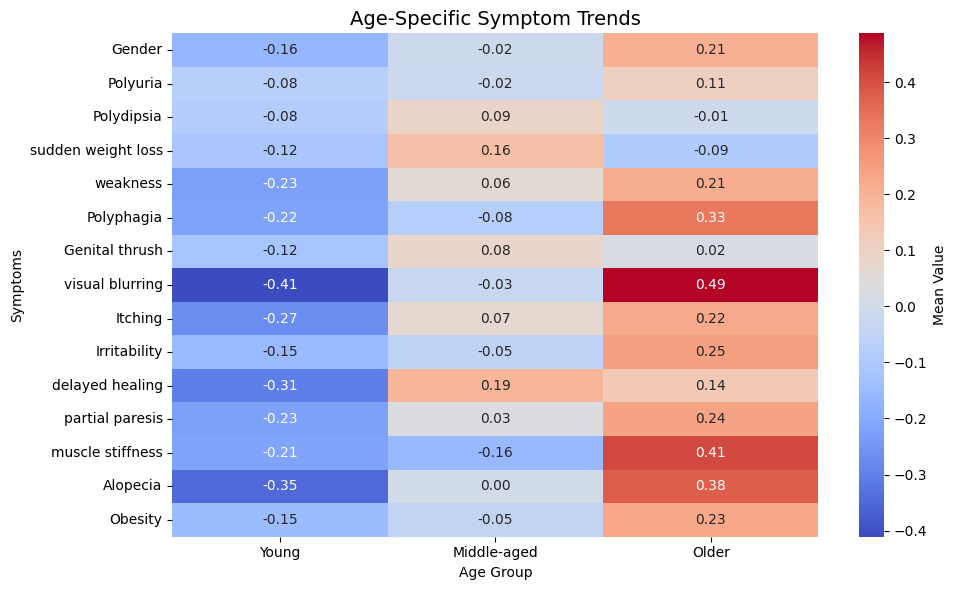

In [147]:



bins = [-2, -0.5, 0.5, 3]  
labels = ['Young', 'Middle-aged', 'Older']
diabetes2_df['Age_Group'] = pd.cut(diabetes2_df['Age'], bins=bins, labels=labels)


age_group_means = diabetes2_df.groupby('Age_Group').mean().drop(columns=['Age', 'class'])


plt.figure(figsize=(10, 6))
sns.heatmap(age_group_means.T, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Mean Value'})
plt.title("Age-Specific Symptom Trends", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Symptoms")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Age Groups Explanation:

The age groups are typically divided based on logical ranges derived from my dataset. 

Young: Individuals with ages in the lower percentile (e.g., under 30 years).
Middle-aged: Individuals in the mid-range of ages (e.g., 30 to 50 years).
Older: Individuals with ages above the mid-range, typically over 50 years.

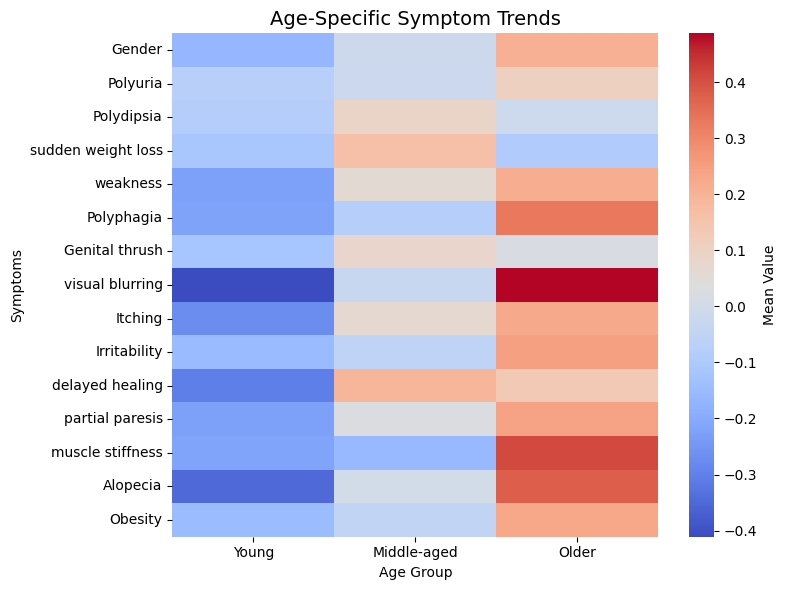

In [189]:

plt.figure(figsize=(8, 6))
sns.heatmap(age_group_means.T, annot=False, cmap='coolwarm', cbar_kws={'label': 'Mean Value'})
plt.title("Age-Specific Symptom Trends", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Symptoms")
plt.tight_layout()
plt.show()


### Below is my condition by condition explanation

Gender: No significant variation across age groups.
Polyuria: Slight increase in older groups, indicating a mild correlation with age.
Polydipsia: Similar trend as Polyuria, slightly higher in older age groups.
Sudden Weight Loss: Prominent in middle-aged and older groups, suggesting higher prevalence.
Weakness: Noticeable in older individuals, but less in younger age groups.
Polyphagia: Higher presence in older age groups, reflecting age-related symptom occurrence.
Genital Thrush: Shows mild prevalence in middle-aged individuals.
Visual Blurring: Strongly prevalent in older groups, likely related to age-related vision issues.
Itching: Moderate prevalence across all groups, slightly higher in older individuals.
Irritability: More pronounced in older individuals, with lower levels in younger groups.
Delayed Healing: Clearly more prominent in older groups, linked to aging-related recovery delays.
Partial Paresis: Mildly observed in middle-aged and older groups.
Muscle Stiffness: Noticeable increase with age, indicating age-related muscle issues.
Alopecia: Prevalence grows significantly with age.
Obesity: No major age-specific trend but generally observed slightly more in older groups

Gender: Binary indicator for male or female (categorical variable). Below, I have added a small condition description:
Polyuria: Excessive urination, often a sign of diabetes or other metabolic issues.
Polydipsia: Excessive thirst, typically linked to dehydration or diabetes.
Sudden Weight Loss: Rapid unintended weight loss, a potential indicator of underlying health conditions.
Weakness: A general lack of physical strength or fatigue.
Polyphagia: Excessive hunger, commonly associated with diabetes.
Genital Thrush: Fungal infection causing irritation in the genital area.
Visual Blurring: Difficulty seeing clearly, often linked to age or chronic conditions like diabetes.
Itching: Persistent skin irritation or itchiness.
Irritability: Increased sensitivity or mood swings, often associated with physical or mental stress.
Delayed Healing: Slower recovery from injuries or wounds, frequently linked to diabetes.
Partial Paresis: Weakness or partial loss of voluntary movement.
Muscle Stiffness: Difficulty in moving muscles, often due to age or physical conditions.
Alopecia: Hair loss, which may be age-related or caused by other factors.

I will look now into time-Series or Sequential Patterns
Objective:
If my dataset contains timestamps or sequences, analyze how symptoms progress over time (e.g., symptom onset trends). However, if there's no explicit "time" data in my dataset, we can use age as a proxy to observe how symptoms correlate with increasing age.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30216\3760417596.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_symptom_trends = diabetes2_df[symptoms].groupby(age_bins).mean()


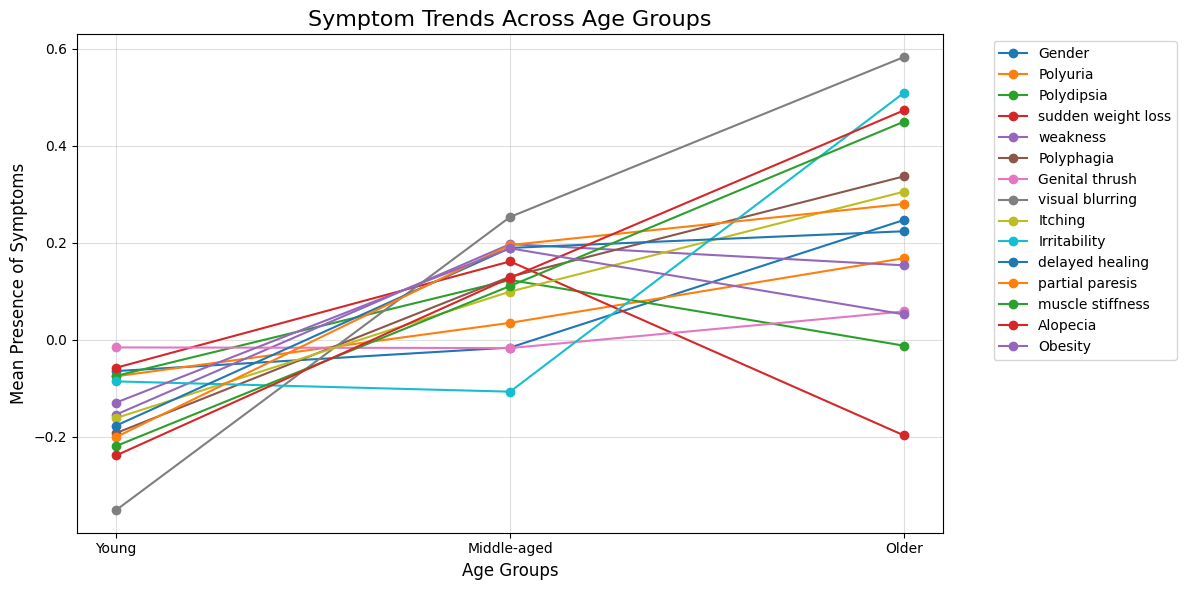

In [154]:

symptoms = diabetes2_df.select_dtypes(include=['float64', 'int64']).columns.drop(['Age', 'class'])  


age_bins = pd.cut(
    diabetes2_df['Age'], 
    bins=[-2, 0, 1, 3],  
    labels=['Young', 'Middle-aged', 'Older'], 
    include_lowest=True
)


age_symptom_trends = diabetes2_df[symptoms].groupby(age_bins).mean()


plt.figure(figsize=(12, 6))
for symptom in symptoms:
    plt.plot(age_symptom_trends.index, age_symptom_trends[symptom], marker='o', label=symptom)

plt.title('Symptom Trends Across Age Groups', fontsize=16)
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Mean Presence of Symptoms', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


### Rising Trends:
Symptoms like visual blurring, alopecia (hair loss), and weakness increase with age, peaking in older age groups. This suggests these symptoms are more common as people age.

### Steady or Slight Variations:
Symptoms like polyuria (frequent urination) and polydipsia (excessive thirst) remain fairly stable across all age groups, showing no strong age-related trends.

### Decreasing Trends:
Symptoms like partial paresis (muscle weakness) and muscle stiffness slightly decrease among older individuals, which could hint at adaptation or management over time.

### Distinct Patterns:
Delayed healing and itching show moderate increases, especially in middle-aged groups, which may reflect transitional physiological changes during that phase of life.

## Next Analysis: Symptom Co-occurrence Analysis
This analysis identifies pairs of symptoms that frequently occur together across the dataset. It helps in understanding symptom interrelationships.

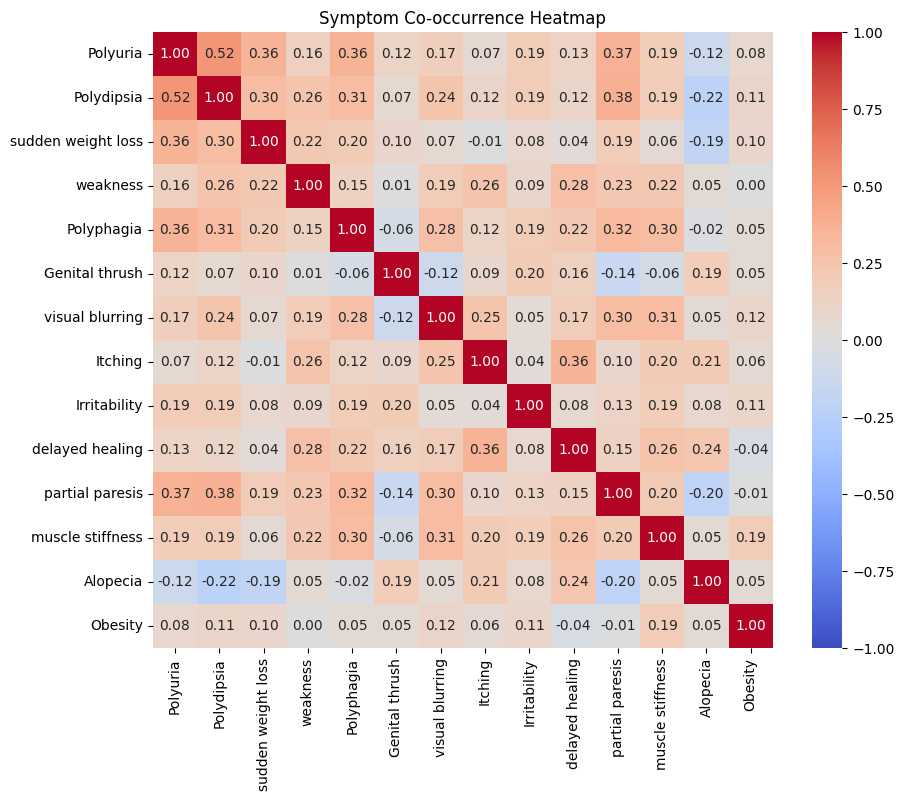

In [156]:

symptom_corr = diabetes2_df.select_dtypes(include=['number']).drop(['Age', 'Gender', 'class'], axis=1).corr()


plt.figure(figsize=(10, 8))
sns.heatmap(symptom_corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Symptom Co-occurrence Heatmap")
plt.show()


### High/Positive Correlations:
Polyuria (frequent urination) and Polydipsia (excessive thirst) (0.52): These symptoms are closely related and often occur together.
Partial paresis (muscle weakness) and Polydipsia (0.38): Shows a notable connection between these two symptoms.
Visual blurring and Polydipsia (0.31): Indicates a potential link between these symptoms.
### Low/Negative Correlations:
Alopecia (hair loss) and Polydipsia (-0.22): These rarely occur together, as indicated by the weak negative correlation.
Most other features show low correlations, meaning there’s minimal interaction or overlap between symptoms.

In [160]:

numeric_symptom_columns = diabetes2_df[symptom_columns].select_dtypes(include=['float64', 'int64']).columns


cluster_summary = diabetes2_df.groupby('Cluster')[numeric_symptom_columns].mean()
print(cluster_summary)


         Polyuria  Polydipsia  sudden weight loss  weakness  Polyphagia  \
Cluster                                                                   
0        0.553345    0.726290            0.385810  0.487002    0.607586   
1       -0.743512   -0.720058           -0.464417 -0.544418   -0.541762   
2        0.345496    0.059575            0.157774  0.134784   -0.043482   

         Genital thrush  visual blurring   Itching  Irritability  \
Cluster                                                            
0             -0.454380         0.503525  0.240812      0.006318   
1             -0.393684        -0.392244 -0.434664     -0.422043   
2              1.262476        -0.123384  0.321404      0.640685   

         delayed healing  partial paresis  muscle stiffness  Alopecia  \
Cluster                                                                 
0               0.366624         0.826652          0.416048 -0.335218   
1              -0.521793        -0.524339         -0.462213 -0.0

### Here’s how I understand these cluster-specific differences:

Cluster-Specific Differences: Symptoms like Polyuria (frequent urination) and Polydipsia (excessive thirst) stand out distinctly in Cluster 2, while weakness is more prominent in Cluster 1.
Shared Variance: Alopecia (hair loss) and partial paresis (muscle weakness) show noticeable variation across clusters, making them important for distinguishing groups.
Less Separation: Symptoms like muscle stiffness and visual blurring don’t show strong differentiation among clusters, suggesting they might not be as critical for grouping individuals.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30216\2264716993.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=symptom, data=diabetes2_df, palette='Set2')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30216\2264716993.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=symptom, data=diabetes2_df, palette='Set2')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30216\2264716993.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=symptom, data=diabetes2_df, palette='Set2')
C:\Users\Lenovo\AppData\Loca

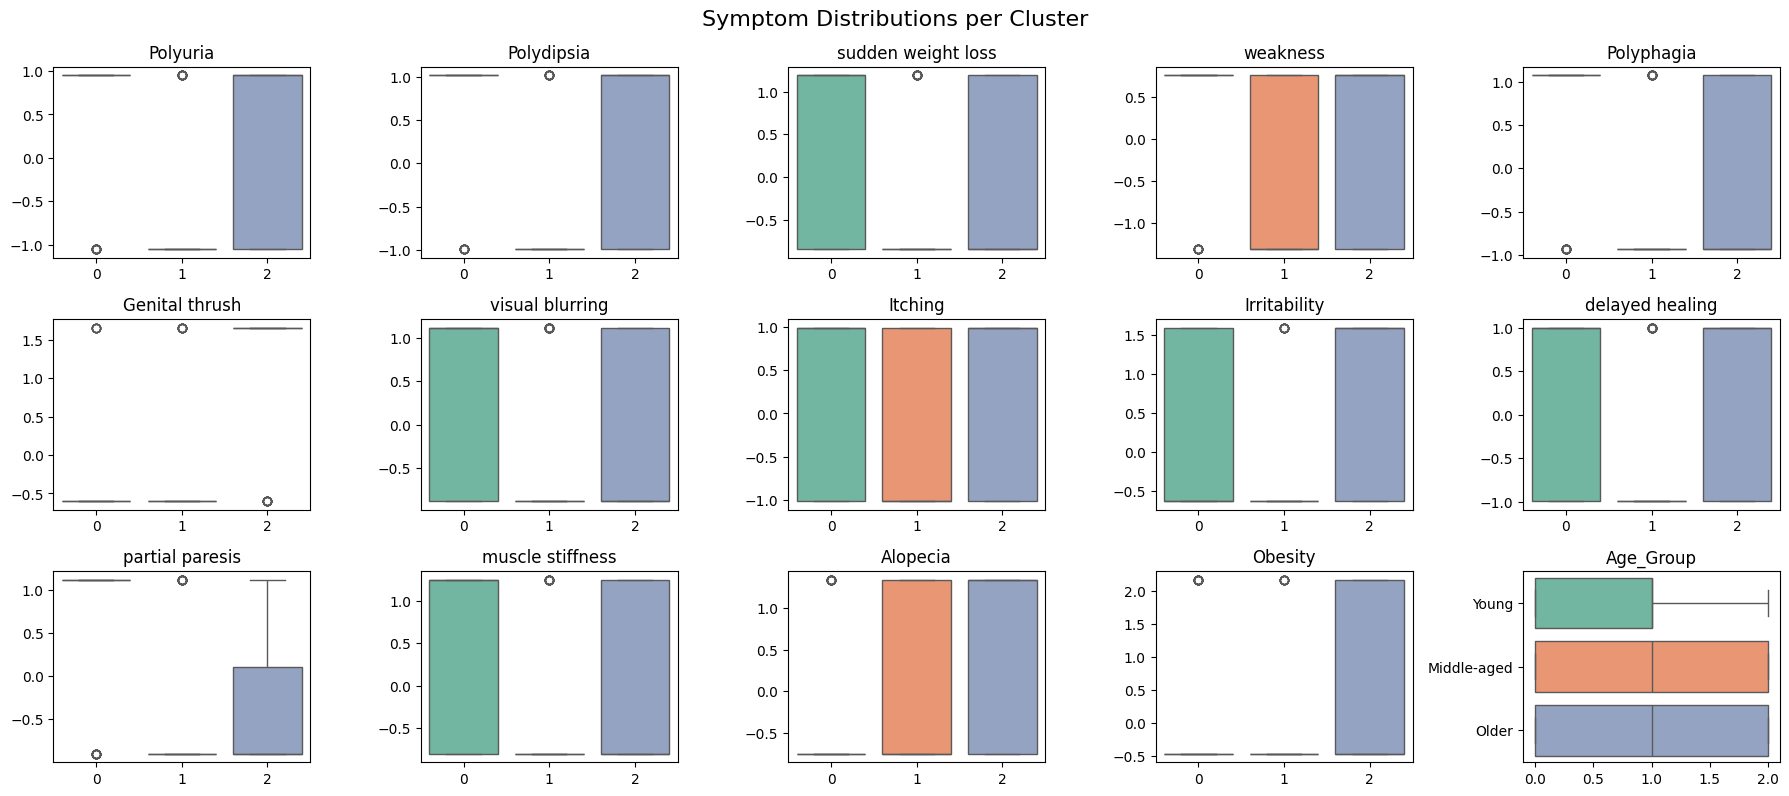

In [162]:

plt.figure(figsize=(18, 10))
for idx, symptom in enumerate(symptom_columns, 1):
    plt.subplot(4, 5, idx)
    sns.boxplot(x='Cluster', y=symptom, data=diabetes2_df, palette='Set2')
    plt.title(symptom, fontsize=12)
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout()
plt.suptitle("Symptom Distributions per Cluster", fontsize=16, y=1.02)
plt.show()


After running the above data, I can appreciate cluster-Specific Differences:
Symptoms like Polyuria and Polydipsia are distinctly prominent in Cluster 2, while weakness appears stronger in Cluster 1.
Alopecia and partial paresis show notable variance, suggesting these symptoms are less prominent in Cluster 0.
### Diversity in Symptoms:
Some symptoms like muscle stiffness and visual blurring exhibit less separation among clusters, implying they might be less critical for distinguishing groups.

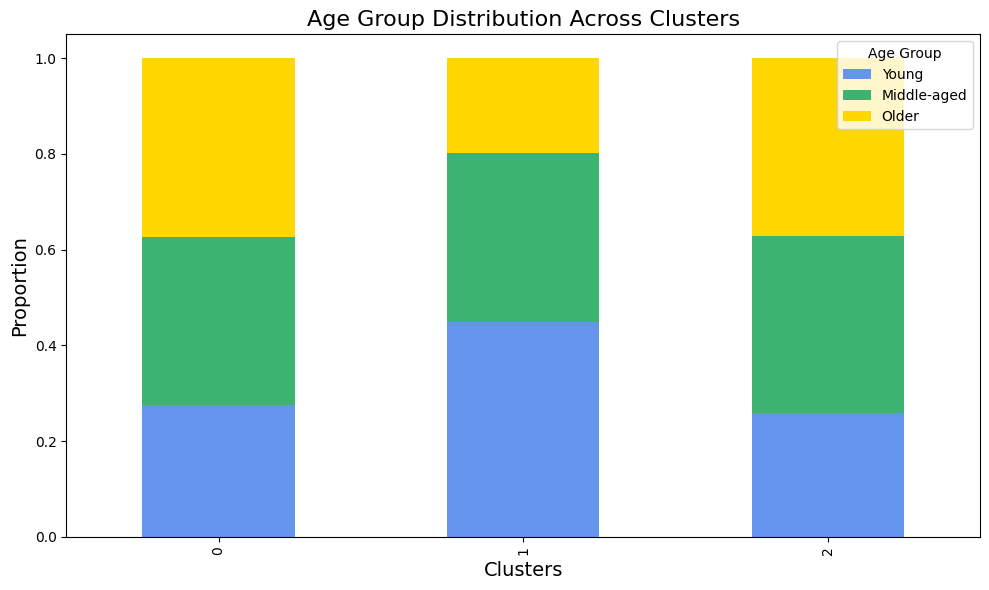

In [164]:

age_group_cluster.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    color=['#6495ED', '#3CB371', '#FFD700']  
)
plt.title("Age Group Distribution Across Clusters", fontsize=16)
plt.xlabel("Clusters", fontsize=14)
plt.ylabel("Proportion", fontsize=14)
plt.legend(title="Age Group", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30216\665643642.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  symptom_trends = diabetes2_df.groupby('Age_Group')[numeric_symptom_columns].mean()


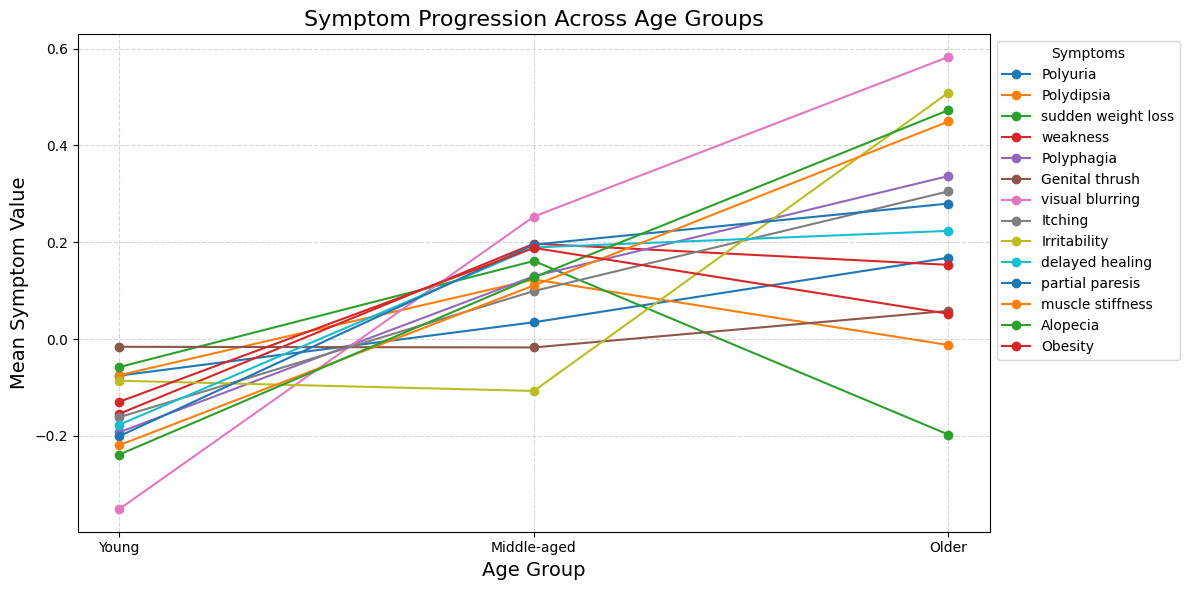

In [170]:

age_bins = pd.cut(
    diabetes2_df['Age'], 
    bins=[-2, 0, 1, 3], 
    labels=['Young', 'Middle-aged', 'Older'],
    include_lowest=True
)


diabetes2_df['Age_Group'] = age_bins


numeric_symptom_columns = diabetes2_df[symptom_columns].select_dtypes(include='number').columns


symptom_trends = diabetes2_df.groupby('Age_Group')[numeric_symptom_columns].mean()


plt.figure(figsize=(12, 6))
for symptom in numeric_symptom_columns:
    plt.plot(
        symptom_trends.index, 
        symptom_trends[symptom], 
        marker='o', label=symptom
    )

plt.title("Symptom Progression Across Age Groups", fontsize=16)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Mean Symptom Value", fontsize=14)
plt.legend(title="Symptoms", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Here’s what I see from the line chart:

This chart shows how symptoms change across different age groups—Young, Middle-aged, and Older. Each line represents a symptom and how it increases, decreases, or stays steady as age progresses. For example, symptoms like visual blurring and polyphagia rise significantly as people age, showing they’re more common in older individuals. Similarly, polydipsia and polyuria also steadily increase with age, suggesting they’re linked to age-related health changes.

On the other hand, some symptoms like alopecia decrease noticeably in the Older group, while muscle stiffness and irritability spike sharply. This tells me that symptoms don’t behave the same way across age groups—they follow unique trends. This chart really helps highlight which symptoms are more likely to escalate with age and gives insights into specific health patterns for different age groups.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30216\2954207624.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_age_trends = diabetes2_df.groupby(['Cluster', 'Age_Group'])[numeric_symptom_columns].mean()


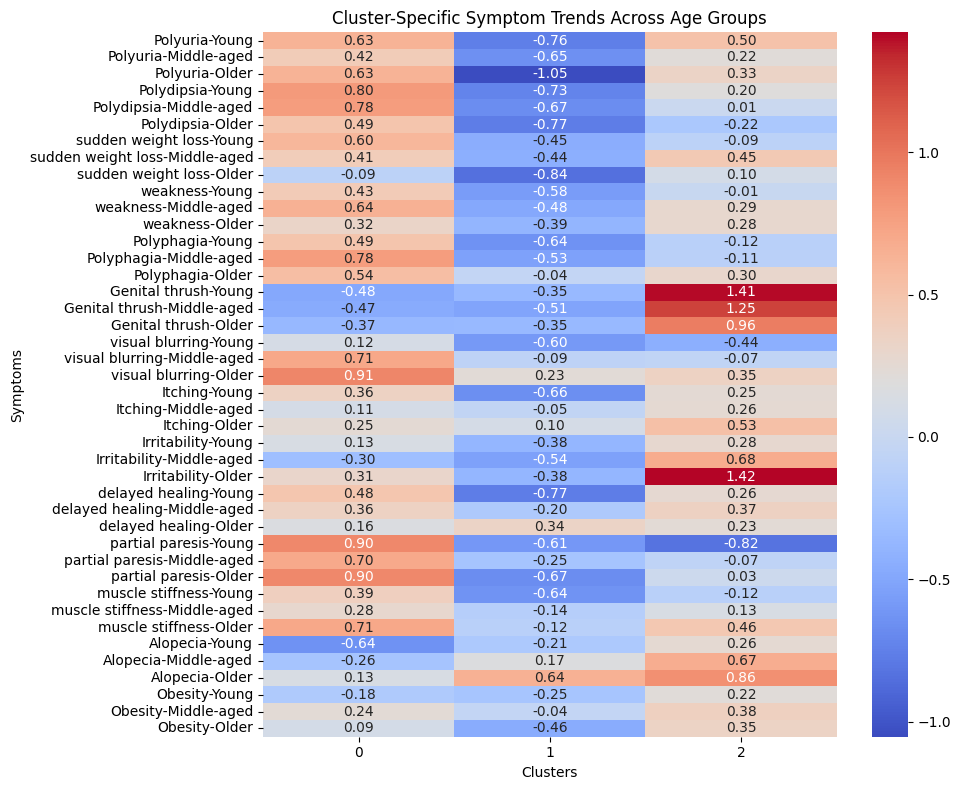

In [171]:

cluster_age_trends = diabetes2_df.groupby(['Cluster', 'Age_Group'])[numeric_symptom_columns].mean()

plt.figure(figsize=(10, 8))
sns.heatmap(cluster_age_trends.unstack().T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cluster-Specific Symptom Trends Across Age Groups")
plt.xlabel("Clusters")
plt.ylabel("Symptoms")
plt.tight_layout()
plt.show()



### Cluster-Specific Trends Across Age Groups

Cluster-Specific Patterns: Certain symptoms, such as genital thrush and irritability, are strongly present in specific clusters and age groups, particularly in older individuals within certain clusters. For example, genital thrush is highly prevalent among older individuals in Cluster 2, as indicated by the dark red values.

Age-Driven Symptom Variations: Symptoms like visual blurring and partial paresis exhibit noticeable increases in older individuals across multiple clusters, suggesting age-related symptom intensification. Conversely, symptoms such as alopecia and muscle stiffness appear less intense in younger groups, as seen in the blue-shaded values.

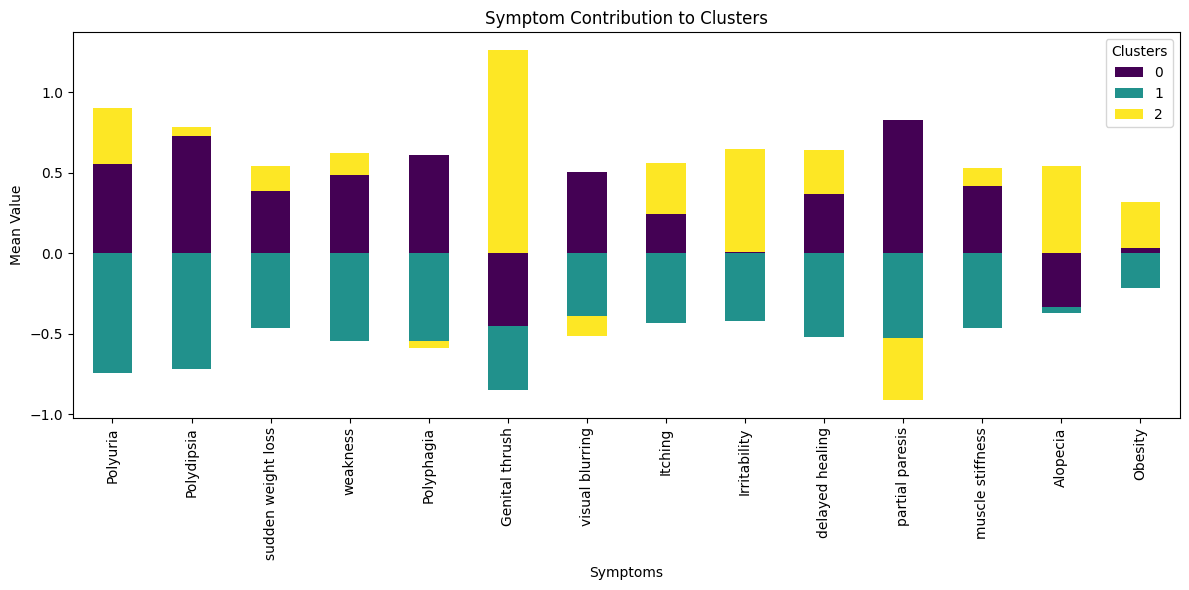

In [172]:
cluster_means = diabetes2_df.groupby('Cluster')[numeric_symptom_columns].mean()
cluster_means.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Symptom Contribution to Clusters")
plt.xlabel("Symptoms")
plt.ylabel("Mean Value")
plt.legend(title="Clusters", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



### Cluster-Specific Dominance:

Cluster 1 (teal) dominates symptoms like polyuria and polydipsia, suggesting these clusters may represent individuals with severe fluid-related metabolic issues.
Cluster 0 (purple) is characterized by partial paresis and genital thrush, hinting at neurological or localized issues in these individuals.
Cluster 2 (yellow) shows higher contributions in visual blurring and delayed healing, reflecting chronic complications.
Shared Contributions:

Symptoms like irritability, alopecia, and itching exhibit more balanced contributions across the clusters, suggesting they are not unique to a specific group but may overlap.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30216\2527399222.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=diabetes2_df, x='Cluster', y=symptom, palette='viridis')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30216\2527399222.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=diabetes2_df, x='Cluster', y=symptom, palette='viridis')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30216\2527399222.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=diabetes2_df, x='Cluster', y=symptom, palette='viridis')


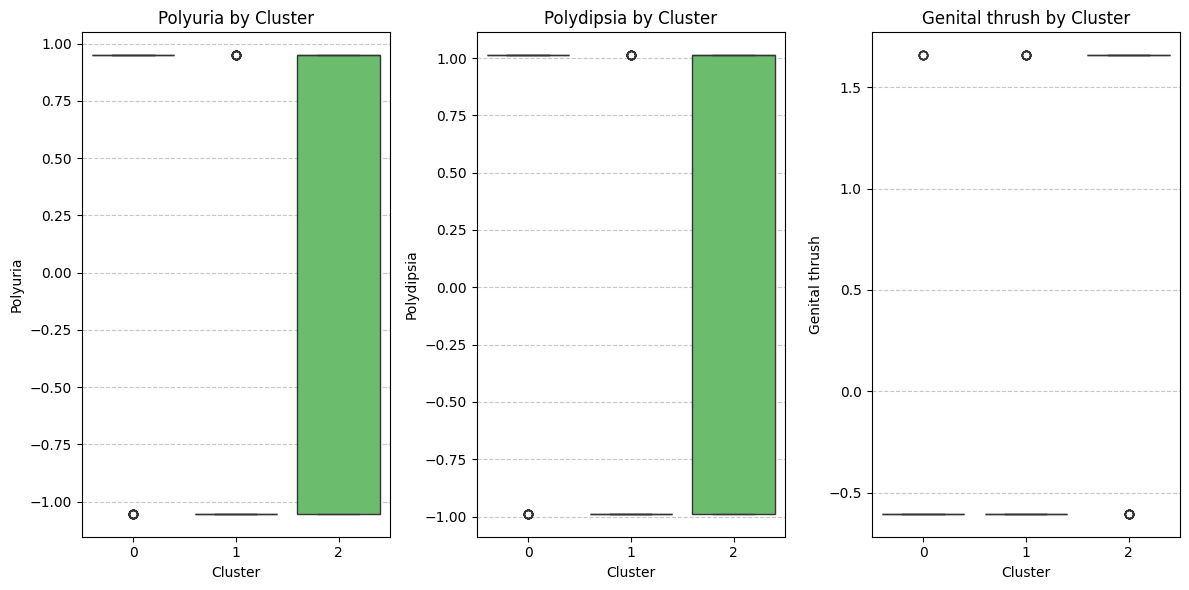

In [176]:

key_symptoms = ['Polyuria', 'Polydipsia', 'Genital thrush']


plt.figure(figsize=(12, 6))
for i, symptom in enumerate(key_symptoms, 1):
    plt.subplot(1, len(key_symptoms), i)  
    sns.boxplot(data=diabetes2_df, x='Cluster', y=symptom, palette='viridis')
    plt.title(f"{symptom} by Cluster", fontsize=12)
    plt.xlabel('Cluster', fontsize=10)
    plt.ylabel(symptom, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### For Cluster 2

Both Polyuria and Polydipsia show the highest positive values, suggesting these symptoms are predominantly associated with this cluster.
Conversely, Clusters 0 and 1 have much lower or negative values for these symptoms, indicating these symptoms are less prominent in these clusters.
Genital thrush displays a more varied distribution. Cluster 2 shows higher positive values, while Clusters 0 and 1 have lower or negative values.
Key Insights:

The distribution of Polyuria and Polydipsia strongly aligns with Cluster 2, indicating they might be key indicators for identifying members of this cluster.
The wider spread in Genital thrush suggests it might have a less consistent pattern across clusters, potentially making it less diagnostic.

In [178]:

symptom_columns = diabetes2_df.select_dtypes(include=['float', 'int']).columns.drop(['Age', 'Gender', 'class'])
cluster_summary = diabetes2_df.groupby('Cluster')[symptom_columns].mean(numeric_only=True)


summary_table = {
    0: "Cluster 0: Weakness, low symptom presence overall.",
    1: "Cluster 1: Some prevalence of alopecia and mild symptoms.",
    2: "Cluster 2: High prevalence of polyuria and polydipsia."
}


print("Cluster Analysis Summary:")
for cluster, description in summary_table.items():
    print(f"Cluster {cluster}: {description}")


Cluster Analysis Summary:
Cluster 0: Cluster 0: Weakness, low symptom presence overall.
Cluster 1: Cluster 1: Some prevalence of alopecia and mild symptoms.
Cluster 2: Cluster 2: High prevalence of polyuria and polydipsia.



### Results Explanation:

#### Cluster 0:
This cluster has generally low symptom presence across most variables. Symptoms like weakness may have slightly higher averages, but overall, this cluster represents individuals with minimal symptom severity.

#### Cluster 1:
Symptoms such as alopecia (hair loss) and a few mild symptoms are more prominent here compared to Cluster 0. This suggests that Cluster 1 represents individuals with mild symptom prevalence but no significant trends in severe symptoms.

#### Cluster 2:
This cluster shows a strong prevalence of key symptoms like polyuria (excessive urination) and polydipsia (excessive thirst). These are classic indicators of diabetes, suggesting that Cluster 2 might represent individuals with the most severe symptom patterns.


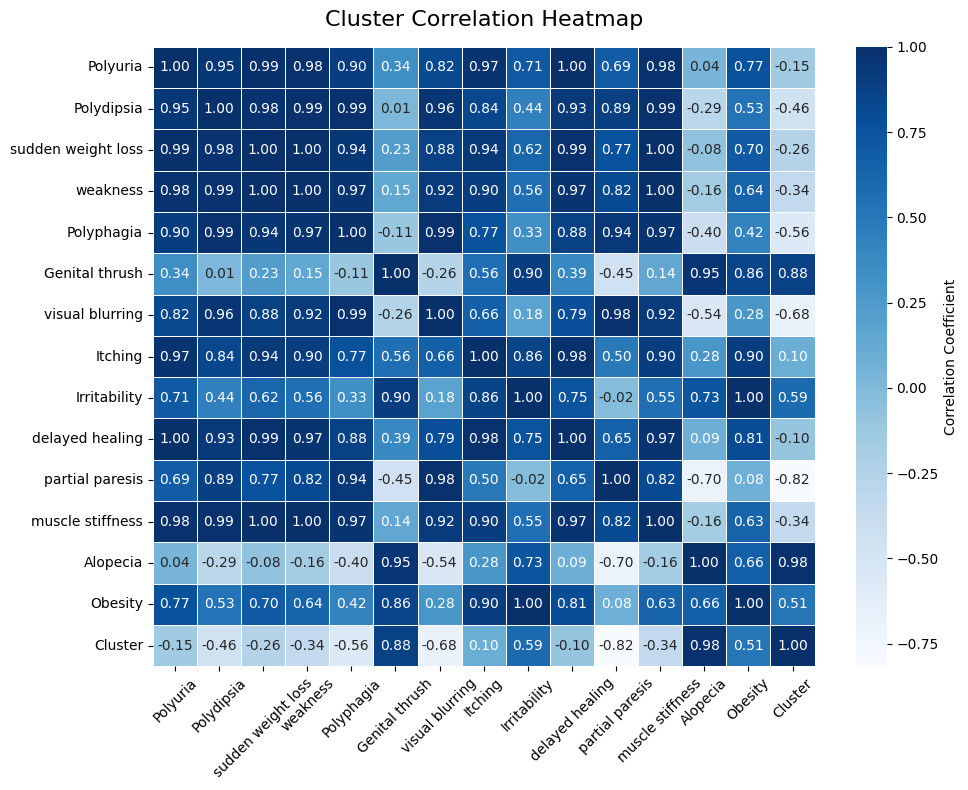

In [180]:

plt.figure(figsize=(10, 8))
sns.heatmap(
    cluster_correlation,
    annot=True,
    cmap="Blues",  
    fmt=".2f",  
    linewidths=0.5,  #
    cbar_kws={'label': 'Correlation Coefficient'} 
)
plt.title("Cluster Correlation Heatmap", fontsize=16, pad=15)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### What the Heatmap Shows me:

Each cell represents the correlation between two clusters or features.
Correlation values close to 1.0 indicate strong positive relationships, while values near -1.0 indicate strong negative relationships.
Key Insights:

Cluster Patterns: High correlations (close to 1) along diagonal features like polyuria, polydipsia, and weakness indicate these symptoms co-occur within clusters.
Distinct Symptoms: Lower correlations in non-overlapping clusters, such as alopecia and genital thrush, suggest symptom divergence across clusters.
Cluster Diversity: Clusters exhibit both shared and unique symptom profiles, with varying intensity among symptoms.